# Electricity price data parsing showcase

In [1]:
import requests
import xmltodict

example_date = '20240525'
zone = '2'
url = f'https://www.atsenergo.ru/market/stats.xml?period=0&date1={example_date}&date2={example_date}&zone={zone}&type=graph'
response = requests.get(url, verify = False) #verify = False --> self-signed cert
content = response.content
result = xmltodict.parse(content)
result

C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.atsenergo.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'view': {'@date1': '20240525',
  '@date2': '20240525',
  '@period': '0',
  'columns': {'name': [{'@type': 'varchar2', '#text': 'DAT'},
    {'@type': 'number', '#text': 'PRICE_ZONE_CODE'},
    {'@type': 'number', '#text': 'CONSUMER_VOLUME'},
    {'@type': 'number', '#text': 'CONSUMER_PRICE'},
    {'@type': 'number', '#text': 'CONSUMER_RD_VOLUME'},
    {'@type': 'number', '#text': 'CONSUMER_SPOT_VOLUME'},
    {'@type': 'number', '#text': 'CONSUMER_PROVIDE_RD'},
    {'@type': 'number', '#text': 'CONSUMER_MAX_PRICE'},
    {'@type': 'number', '#text': 'CONSUMER_MIN_PRICE'},
    {'@type': 'number', '#text': 'SUPPLIER_VOLUME'},
    {'@type': 'number', '#text': 'SUPPLIER_PRICE'},
    {'@type': 'number', '#text': 'SUPPLIER_RD_VOLUME'},
    {'@type': 'number', '#text': 'SUPPLIER_SPOT_VOLUME'},
    {'@type': 'number', '#text': 'SUPPLIER_PROVIDE_RD'},
    {'@type': 'number', '#text': 'SUPPLIER_MAX_PRICE'},
    {'@type': 'number', '#text': 'SUPPLIER_MIN_PRICE'},
    {'@type': 'number', '#text': 'H

In [2]:
from operator import itemgetter

columns = list(map(itemgetter('#text'), result['view']['columns']['name']))
columns

['DAT',
 'PRICE_ZONE_CODE',
 'CONSUMER_VOLUME',
 'CONSUMER_PRICE',
 'CONSUMER_RD_VOLUME',
 'CONSUMER_SPOT_VOLUME',
 'CONSUMER_PROVIDE_RD',
 'CONSUMER_MAX_PRICE',
 'CONSUMER_MIN_PRICE',
 'SUPPLIER_VOLUME',
 'SUPPLIER_PRICE',
 'SUPPLIER_RD_VOLUME',
 'SUPPLIER_SPOT_VOLUME',
 'SUPPLIER_PROVIDE_RD',
 'SUPPLIER_MAX_PRICE',
 'SUPPLIER_MIN_PRICE',
 'HOUR']

In [3]:
rows = list(map(itemgetter('col'), result['view']['row']))
rows

[['25.05.2024',
  '2',
  '22203.125',
  '980.20',
  '1668.294',
  '20280.835',
  '88.748',
  '1272.48',
  '820.00',
  '23182.158',
  '932.06',
  '1668.294',
  '20862.595',
  '87.531',
  '6356.46',
  '820.48',
  '0'],
 ['25.05.2024',
  '2',
  '22199.316',
  '922.71',
  '1753.041',
  '20259.678',
  '160.861',
  '1198.10',
  '780.00',
  '23119.021',
  '879.66',
  '1753.041',
  '20714.249',
  '87.069',
  '6356.46',
  '780.06',
  '1'],
 ['25.05.2024',
  '2',
  '22400.072',
  '979.89',
  '4475.091',
  '17727.977',
  '146.849',
  '1225.10',
  '825.00',
  '23293.364',
  '937.06',
  '4475.091',
  '18456.912',
  '377.439',
  '6356.46',
  '825.21',
  '2'],
 ['25.05.2024',
  '2',
  '22986.104',
  '975.54',
  '4508.715',
  '18273.426',
  '136.163',
  '1244.92',
  '825.35',
  '23949.869',
  '924.85',
  '4508.715',
  '19080.313',
  '377.959',
  '6356.46',
  '825.35',
  '3'],
 ['25.05.2024',
  '2',
  '23689.140',
  '991.68',
  '3768.499',
  '19712.048',
  '104.692',
  '1501.81',
  '825.38',
  '24714.6

In [4]:
len(rows)

24

In [5]:
print(len(columns))
print(len(rows[0]))

17
17


# Parsing data for Russian day-ahead electricity market (РСВ, Рынок "на сутки вперед")

In [6]:
class ElectricityHourPrice:
    def __init__(self, 
                 date, 
                 price_zone_code, 
                 consumer_volume, 
                 consumer_price, 
                 consumer_rd_volume,
                 consumer_spot_volume,
                 consumer_provide_rd,
                 consumer_max_price,
                 consumer_min_price,
                 supplier_volume,
                 supplier_price,
                 supplier_rd_volume,
                 supplier_spot_volume,
                 supplier_provide_rd,
                 supplier_max_price,
                 supplier_min_price,
                 hour):
        self.date = date
        self.price_zone_code = price_zone_code
        self.consumer_volume = consumer_volume
        self.consumer_price = consumer_price
        self.consumer_rd_volume = consumer_rd_volume
        self.consumer_spot_volume = consumer_spot_volume
        self.consumer_provide_rd = consumer_provide_rd
        self.consumer_max_price = consumer_max_price
        self.consumer_min_price = consumer_min_price
        self.supplier_volume = supplier_volume
        self.supplier_price = supplier_price
        self.supplier_rd_volume = supplier_rd_volume
        self.supplier_spot_volume = supplier_spot_volume
        self.supplier_provide_rd = supplier_provide_rd
        self.supplier_max_price = supplier_max_price
        self.supplier_min_price = supplier_min_price
        self.hour = hour

In [7]:
import requests
import xmltodict
from operator import itemgetter

def get_prices_by_date(date, zone = '2'):
    f_date = date.strftime('%Y%m%d')
    url = f'https://www.atsenergo.ru/market/stats.xml?period=0&date1={f_date}&date2={f_date}&zone={zone}&type=graph'
    response = requests.get(url, verify = False) #verify = False --> self-signed cert
    content = response.content
    result = xmltodict.parse(content)
    rows = list(map(itemgetter('col'), result['view']['row']))
    return rows

In [8]:
import datetime

start_date = datetime.datetime(2019, 5, 27)
end_date = datetime.datetime(2024, 5, 27)

print(f'Start date: {start_date.strftime("%Y-%m-%d")}')
print(f'End date: {end_date.strftime("%Y-%m-%d")}')
print(f'Time period: {str(end_date - start_date)}')

Start date: 2019-05-27
End date: 2024-05-27
Time period: 1827 days, 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")

electricity_hour_prices = []
cur_date = start_date
print(f'Starting getting prices for {start_date.strftime("%Y-%m-%d")}')
while cur_date <= end_date:
    if (cur_date.day % 7 == 0):
        print(f'Getting prices for {cur_date.strftime("%Y-%m-%d")}')
    try:
        price_rows = get_prices_by_date(cur_date)
        for price_row in price_rows:
            electricity_hour_prices.append(ElectricityHourPrice(*price_row))
    except:
        print(f"Can't get the price data for {cur_date.strftime("%Y-%m-%d")}")
    finally:
        cur_date += datetime.timedelta(days = 1)
print(f'Finished getting prices for {end_date.strftime("%Y-%m-%d")}')

# Saving dataset

In [ ]:
import pandas as pd

df = pd.DataFrame([vars(price_row) for price_row in electricity_hour_prices])
df.to_csv('electricity_price_hourly.csv', index = False)

In [11]:
df

date  price_zone_code  consumer_volume  consumer_price   
0      27.05.2019                2        19685.097          977.14  \
1      27.05.2019                2        19726.380          963.62   
2      27.05.2019                2        20239.883          973.13   
3      27.05.2019                2        20995.160          968.37   
4      27.05.2019                2        21609.945          990.70   
...           ...              ...              ...             ...   
43867  27.05.2024                2        23399.518         1296.07   
43868  27.05.2024                2        22893.477         1097.29   
43869  27.05.2024                2        22646.207         1002.35   
43870  27.05.2024                2        22406.550          956.75   
43871  27.05.2024                2        22288.750          910.46   

       consumer_rd_volume  consumer_spot_volume  consumer_provide_rd   
0                1346.269             17842.336               20.716  \
1                1415.475             17842.523               46.652   
2                3697.367             16051.952               12.074   
3                3732.538             16775.092                3.755   
4                3110.962             18014.445                5.120   
...                   ...                   ...                  ...   
43867            1668.294             21483.007               67.317   
43868            1668.294             21003.767               93.444   
43869            1668.294             20761.271              108.404   
43870            1668.294             20519.151              116.703   
43871            1668.294             20393.336              119.281   

       consumer_max_price  consumer_min_price  supplier_volume   
0                 1239.55              792.00        20241.847  \
1                 1093.66              824.35        20211.020   
2                 1123.16              870.40        20672.191   
3                 1117.11              879.52        21433.658   
4                 1138.77              899.34        22048.683   
...                   ...                 ...              ...   
43867             1970.20             1047.55        24333.823   
43868             1781.70              758.90        23927.360   
43869             1686.50              758.93        23716.348   
43870             1488.00              758.95        23448.293   
43871             1438.90              739.99        23297.776   

       supplier_price  supplier_rd_volume  supplier_spot_volume   
0              949.90            1346.269             18324.413  \
1              942.20            1415.475             18221.361   
2              952.14            3697.367             16719.691   
3              944.93            3732.538             17461.745   
4              966.00            3110.962             18598.055   
...               ...                 ...                   ...   
43867         1227.36            1668.294             21993.238   
43868         1010.99            1668.294             21586.775   
43869          936.12            1668.294             21375.763   
43870          900.28            1668.294             21107.708   
43871          861.15            1668.294             20957.191   

       supplier_provide_rd  supplier_max_price  supplier_min_price  hour  
0                  155.535             4417.75              788.62     0  
1                  152.516             4417.75              820.86     1  
2                  465.667             4417.75              866.65     2  
3                  481.425             4417.75              875.56     3  
4                  384.134             4417.75              895.32     4  
...                    ...                 ...                 ...   ...  
43867               75.359             6356.46             1047.55    19  
43868               75.359             6356.46              758.90    20  
43869               75

In [12]:
print(f'Dataset contains data for {int(len(df) / 24)} days')

Dataset contains data for 1828 days


In [13]:
df.describe()

price_zone_code  consumer_volume  consumer_price  consumer_rd_volume   
count          43872.0     43872.000000    43872.000000        43872.000000  \
mean               2.0     24211.114521     1044.620885         3663.979157   
std                0.0      3109.022687      255.756966         1858.698386   
min                2.0     17526.585000        8.630000         1049.615000   
25%                2.0     21643.704000      879.950000         2166.228000   
50%                2.0     24103.036500     1002.190000         3338.126000   
75%                2.0     26620.404750     1229.737500         4569.899000   
max                2.0     33387.071000     2276.610000         9899.658000   

       consumer_spot_volume  consumer_provide_rd  consumer_max_price   
count          43872.000000         43872.000000        43872.000000  \
mean           20019.487203            23.893816         1449.213132   
std             2590.859508            22.158082          309.589501   
min            13552.577000             0.000000          459.430000   
25%            18050.149750             8.785750         1220.415000   
50%            19813.142000            17.587500         1419.355000   
75%            21945.433500            32.142250         1661.895000   
max            28930.396000           571.790000         5167.220000   

       consumer_min_price  supplier_volume  supplier_price   
count        43872.000000     43872.000000    43872.000000  \
mean           718.248190     24973.238956      975.604264   
std            257.914575      3150.538393      257.658681   
min              0.000000     17867.347000        0.450000   
25%            641.087500     22399.867000      822.787500   
50%            733.905000     24793.907000      935.885000   
75%            846.642500     27380.783750     1152.600000   
max           1452.730000     34549.563000     2005.860000   

       supplier_rd_volume  supplier_spot_volume  supplier_provide_rd   
count        43872.000000          43872.000000         43872.000000  \
mean          3663.979157          20747.124959           363.095453   
std           1858.698386           2498.980554           305.284683   
min           1049.615000          14386.980000            11.839000   
25%           2166.228000          18868.168750           152.168000   
50%           3338.126000          20560.325500           263.941000   
75%           4569.899000          22587.196750           457.731000   
max           9899.658000          29500.421000          2191.624000   

       supplier_max_price  supplier_min_price          hour  
count        43872.000000        43872.000000  43872.000000  
mean          4979.341300          722.996230     11.500000  
std           1234.409079          249.690466      6.922265  
min            302.210000            0.000000      0.000000  
25%           4655.060000          647.640000      5.750000  
50%           5004.370000          738.030000     11.500000  
75%           5966.180000          845.522500     17.250000  
max           6579.430000         1452.740000     23.000000

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43872 entries, 0 to 43871
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  43872 non-null  object 
 1   price_zone_code       43872 non-null  int64  
 2   consumer_volume       43872 non-null  float64
 3   consumer_price        43872 non-null  float64
 4   consumer_rd_volume    43872 non-null  float64
 5   consumer_spot_volume  43872 non-null  float64
 6   consumer_provide_rd   43872 non-null  float64
 7   consumer_max_price    43872 non-null  float64
 8   consumer_min_price    43872 non-null  float64
 9   supplier_volume       43872 non-null  float64
 10  supplier_price        43872 non-null  float64
 11  supplier_rd_volume    43872 non-null  float64
 12  supplier_spot_volume  43872 non-null  float64
 13  supplier_provide_rd   43872 non-null  float64
 14  supplier_max_price    43872 non-null  float64
 15  supplier_min_price 

# Formatting dataset

## Changing types of columns

In [15]:
df.columns

Index(['date', 'price_zone_code', 'consumer_volume', 'consumer_price',
       'consumer_rd_volume', 'consumer_spot_volume', 'consumer_provide_rd',
       'consumer_max_price', 'consumer_min_price', 'supplier_volume',
       'supplier_price', 'supplier_rd_volume', 'supplier_spot_volume',
       'supplier_provide_rd', 'supplier_max_price', 'supplier_min_price',
       'hour'],
      dtype='object')

In [16]:
df_form = df.copy()

In [17]:
df.columns[2:-1]

Index(['consumer_volume', 'consumer_price', 'consumer_rd_volume',
       'consumer_spot_volume', 'consumer_provide_rd', 'consumer_max_price',
       'consumer_min_price', 'supplier_volume', 'supplier_price',
       'supplier_rd_volume', 'supplier_spot_volume', 'supplier_provide_rd',
       'supplier_max_price', 'supplier_min_price'],
      dtype='object')

In [18]:
df_form[df.columns[1:-1]] = df_form[df.columns[1:-1]].astype(float)
df_form['hour'] = df_form['hour'].astype(int)
df_form['price_zone_code'] = df_form['price_zone_code'].astype(int)
df_form.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43872 entries, 0 to 43871
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  43872 non-null  object 
 1   price_zone_code       43872 non-null  int32  
 2   consumer_volume       43872 non-null  float64
 3   consumer_price        43872 non-null  float64
 4   consumer_rd_volume    43872 non-null  float64
 5   consumer_spot_volume  43872 non-null  float64
 6   consumer_provide_rd   43872 non-null  float64
 7   consumer_max_price    43872 non-null  float64
 8   consumer_min_price    43872 non-null  float64
 9   supplier_volume       43872 non-null  float64
 10  supplier_price        43872 non-null  float64
 11  supplier_rd_volume    43872 non-null  float64
 12  supplier_spot_volume  43872 non-null  float64
 13  supplier_provide_rd   43872 non-null  float64
 14  supplier_max_price    43872 non-null  float64
 15  supplier_min_price 

## Setting the datetime index

In [19]:
dates_from_table = df_form['date']
hours_from_table = df_form['hour']

In [20]:
from datetime import datetime

dates = [datetime.strptime(i, '%d.%m.%Y') for i in dates_from_table]
dates = [item[0].replace(hour = item[1]) for item in zip(dates, hours_from_table)]
dates[:30]

[datetime.datetime(2019, 5, 27, 0, 0),
 datetime.datetime(2019, 5, 27, 1, 0),
 datetime.datetime(2019, 5, 27, 2, 0),
 datetime.datetime(2019, 5, 27, 3, 0),
 datetime.datetime(2019, 5, 27, 4, 0),
 datetime.datetime(2019, 5, 27, 5, 0),
 datetime.datetime(2019, 5, 27, 6, 0),
 datetime.datetime(2019, 5, 27, 7, 0),
 datetime.datetime(2019, 5, 27, 8, 0),
 datetime.datetime(2019, 5, 27, 9, 0),
 datetime.datetime(2019, 5, 27, 10, 0),
 datetime.datetime(2019, 5, 27, 11, 0),
 datetime.datetime(2019, 5, 27, 12, 0),
 datetime.datetime(2019, 5, 27, 13, 0),
 datetime.datetime(2019, 5, 27, 14, 0),
 datetime.datetime(2019, 5, 27, 15, 0),
 datetime.datetime(2019, 5, 27, 16, 0),
 datetime.datetime(2019, 5, 27, 17, 0),
 datetime.datetime(2019, 5, 27, 18, 0),
 datetime.datetime(2019, 5, 27, 19, 0),
 datetime.datetime(2019, 5, 27, 20, 0),
 datetime.datetime(2019, 5, 27, 21, 0),
 datetime.datetime(2019, 5, 27, 22, 0),
 datetime.datetime(2019, 5, 27, 23, 0),
 datetime.datetime(2019, 5, 28, 0, 0),
 datetime.d

In [21]:
df_form.drop(columns = ['date', 'hour'], inplace = True)
df_form['date'] = dates
df_form['date'] = pd.to_datetime(df_form['date'], utc = True)
df_form = df_form.set_index('date')
df_form = df_form.asfreq('1H')
df_form.sort_index(inplace = True)
df_form

price_zone_code  consumer_volume  consumer_price   
date                                                                          
2019-05-27 00:00:00+00:00                2        19685.097          977.14  \
2019-05-27 01:00:00+00:00                2        19726.380          963.62   
2019-05-27 02:00:00+00:00                2        20239.883          973.13   
2019-05-27 03:00:00+00:00                2        20995.160          968.37   
2019-05-27 04:00:00+00:00                2        21609.945          990.70   
...                                    ...              ...             ...   
2024-05-27 19:00:00+00:00                2        23399.518         1296.07   
2024-05-27 20:00:00+00:00                2        22893.477         1097.29   
2024-05-27 21:00:00+00:00                2        22646.207         1002.35   
2024-05-27 22:00:00+00:00                2        22406.550          956.75   
2024-05-27 23:00:00+00:00                2        22288.750          910.46   

                           consumer_rd_volume  consumer_spot_volume   
date                                                                  
2019-05-27 00:00:00+00:00            1346.269             17842.336  \
2019-05-27 01:00:00+00:00            1415.475             17842.523   
2019-05-27 02:00:00+00:00            3697.367             16051.952   
2019-05-27 03:00:00+00:00            3732.538             16775.092   
2019-05-27 04:00:00+00:00            3110.962             18014.445   
...                                       ...                   ...   
2024-05-27 19:00:00+00:00            1668.294             21483.007   
2024-05-27 20:00:00+00:00            1668.294             21003.767   
2024-05-27 21:00:00+00:00            1668.294             20761.271   
2024-05-27 22:00:00+00:00            1668.294             20519.151   
2024-05-27 23:00:00+00:00            1668.294             20393.336   

                           consumer_provide_rd  consumer_max_price   
date                                                                 
2019-05-27 00:00:00+00:00               20.716             1239.55  \
2019-05-27 01:00:00+00:00               46.652             1093.66   
2019-05-27 02:00:00+00:00               12.074             1123.16   
2019-05-27 03:00:00+00:00                3.755             1117.11   
2019-05-27 04:00:00+00:00                5.120             1138.77   
...                                        ...                 ...   
2024-05-27 19:00:00+00:00               67.317             1970.20   
2024-05-27 20:00:00+00:00               93.444             1781.70   
2024-05-27 21:00:00+00:00              108.404             1686.50   
2024-05-27 22:00:00+00:00              116.703             1488.00   
2024-05-27 23:00:00+00:00              119.281             1438.90   

                           consumer_min_price  supplier_volume   
date                                                             
2019-05-27 00:00:00+00:00              792.00        20241.847  \
2019-05-27 01:00:00+00:00              824.35        20211.020   
2019-05-27 02:00:00+00:00              870.40        20672.191   
2019-05-27 03:00:00+00:00              879.52        21433.658   
2019-05-27 04:00:00+00:00              899.34        22048.683   
...                                       ...              ...   
2024-05-27 19:00:00+00:00             1047.55        24333.823   
2024-05-27 20:00:00+00:00              758.90        23927.360   
2024-05-27 21:00:00+00:00              758.93        23716.348   
2024-05-27 22:00:00+00:00              758.95        23448.293   
2024-05-27 23:00:00+00:00              739.99        23297.776   

                           supplier_price  supplier_rd_volume   
date                                                            
2019-05-27 00:00:00+00:00          949.90            1346.269  \
2019-05-27 01:00:00+00:00          942.20            1415.475   
2019-05-27 02:00:00+00:00          952.14    

## Verifying the order of index

In [22]:
def verify_index(df):
    try:
        return (df.index == pd.date_range(start = df.index.min(), end = df.index.max(), freq = df.index.freq)).all()
    except:
        print("Error: can't verify temporary index")
        return False

verify_index(df_form)

True

## Saving to CSV

In [ ]:
df_form.to_csv('electricity_price_hourly_formatted.csv', index = True)

# Dataset analysis

## Dataset lookup

In [2]:
import pandas as pd

df = pd.read_csv('electricity_price_hourly_formatted.csv', index_col = 'date')
df

price_zone_code  consumer_volume  consumer_price   
date                                                                          
2019-05-27 00:00:00+00:00                2        19685.097          977.14  \
2019-05-27 01:00:00+00:00                2        19726.380          963.62   
2019-05-27 02:00:00+00:00                2        20239.883          973.13   
2019-05-27 03:00:00+00:00                2        20995.160          968.37   
2019-05-27 04:00:00+00:00                2        21609.945          990.70   
...                                    ...              ...             ...   
2024-05-27 19:00:00+00:00                2        23399.518         1296.07   
2024-05-27 20:00:00+00:00                2        22893.477         1097.29   
2024-05-27 21:00:00+00:00                2        22646.207         1002.35   
2024-05-27 22:00:00+00:00                2        22406.550          956.75   
2024-05-27 23:00:00+00:00                2        22288.750          910.46   

                           consumer_rd_volume  consumer_spot_volume   
date                                                                  
2019-05-27 00:00:00+00:00            1346.269             17842.336  \
2019-05-27 01:00:00+00:00            1415.475             17842.523   
2019-05-27 02:00:00+00:00            3697.367             16051.952   
2019-05-27 03:00:00+00:00            3732.538             16775.092   
2019-05-27 04:00:00+00:00            3110.962             18014.445   
...                                       ...                   ...   
2024-05-27 19:00:00+00:00            1668.294             21483.007   
2024-05-27 20:00:00+00:00            1668.294             21003.767   
2024-05-27 21:00:00+00:00            1668.294             20761.271   
2024-05-27 22:00:00+00:00            1668.294             20519.151   
2024-05-27 23:00:00+00:00            1668.294             20393.336   

                           consumer_provide_rd  consumer_max_price   
date                                                                 
2019-05-27 00:00:00+00:00               20.716             1239.55  \
2019-05-27 01:00:00+00:00               46.652             1093.66   
2019-05-27 02:00:00+00:00               12.074             1123.16   
2019-05-27 03:00:00+00:00                3.755             1117.11   
2019-05-27 04:00:00+00:00                5.120             1138.77   
...                                        ...                 ...   
2024-05-27 19:00:00+00:00               67.317             1970.20   
2024-05-27 20:00:00+00:00               93.444             1781.70   
2024-05-27 21:00:00+00:00              108.404             1686.50   
2024-05-27 22:00:00+00:00              116.703             1488.00   
2024-05-27 23:00:00+00:00              119.281             1438.90   

                           consumer_min_price  supplier_volume   
date                                                             
2019-05-27 00:00:00+00:00              792.00        20241.847  \
2019-05-27 01:00:00+00:00              824.35        20211.020   
2019-05-27 02:00:00+00:00              870.40        20672.191   
2019-05-27 03:00:00+00:00              879.52        21433.658   
2019-05-27 04:00:00+00:00              899.34        22048.683   
...                                       ...              ...   
2024-05-27 19:00:00+00:00             1047.55        24333.823   
2024-05-27 20:00:00+00:00              758.90        23927.360   
2024-05-27 21:00:00+00:00              758.93        23716.348   
2024-05-27 22:00:00+00:00              758.95        23448.293   
2024-05-27 23:00:00+00:00              739.99        23297.776   

                           supplier_price  supplier_rd_volume   
date                                                            
2019-05-27 00:00:00+00:00          949.90            1346.269  \
2019-05-27 01:00:00+00:00          942.20            1415.475   
2019-05-27 02:00:00+00:00          952.14    

In [2]:
df.describe()

price_zone_code  consumer_volume  consumer_price  consumer_rd_volume   
count          43872.0     43872.000000    43872.000000        43872.000000  \
mean               2.0     24211.114521     1044.620885         3663.979157   
std                0.0      3109.022687      255.756966         1858.698386   
min                2.0     17526.585000        8.630000         1049.615000   
25%                2.0     21643.704000      879.950000         2166.228000   
50%                2.0     24103.036500     1002.190000         3338.126000   
75%                2.0     26620.404750     1229.737500         4569.899000   
max                2.0     33387.071000     2276.610000         9899.658000   

       consumer_spot_volume  consumer_provide_rd  consumer_max_price   
count          43872.000000         43872.000000        43872.000000  \
mean           20019.487203            23.893816         1449.213132   
std             2590.859508            22.158082          309.589501   
min            13552.577000             0.000000          459.430000   
25%            18050.149750             8.785750         1220.415000   
50%            19813.142000            17.587500         1419.355000   
75%            21945.433500            32.142250         1661.895000   
max            28930.396000           571.790000         5167.220000   

       consumer_min_price  supplier_volume  supplier_price   
count        43872.000000     43872.000000    43872.000000  \
mean           718.248190     24973.238956      975.604264   
std            257.914575      3150.538393      257.658681   
min              0.000000     17867.347000        0.450000   
25%            641.087500     22399.867000      822.787500   
50%            733.905000     24793.907000      935.885000   
75%            846.642500     27380.783750     1152.600000   
max           1452.730000     34549.563000     2005.860000   

       supplier_rd_volume  supplier_spot_volume  supplier_provide_rd   
count        43872.000000          43872.000000         43872.000000  \
mean          3663.979157          20747.124959           363.095453   
std           1858.698386           2498.980554           305.284683   
min           1049.615000          14386.980000            11.839000   
25%           2166.228000          18868.168750           152.168000   
50%           3338.126000          20560.325500           263.941000   
75%           4569.899000          22587.196750           457.731000   
max           9899.658000          29500.421000          2191.624000   

       supplier_max_price  supplier_min_price  
count        43872.000000        43872.000000  
mean          4979.341300          722.996230  
std           1234.409079          249.690466  
min            302.210000            0.000000  
25%           4655.060000          647.640000  
50%           5004.370000          738.030000  
75%           5966.180000          845.522500  
max           6579.430000         1452.740000

In [5]:
def dataset_lookup(df):
    print('Dataset info:')
    print(df.info())
    print()
    print('Dataset description:')
    print(df.describe())
    print()
    print('Amount of duplicates:')
    duplicates_amount = df.duplicated().sum()
    print(duplicates_amount)
    if (duplicates_amount > 0):
        print('Duplicates:')
        print(df[df.duplicated(keep = False)])
    print()
    print('Amount of missing values:')
    print(df.isna().sum(axis = 0))
    print()
    print('Unique values in each column:')
    object_types_count = 0
    for column in df:
        if df[column].dtypes == 'object':
            object_types_count += 1
            print('-' * len(column))
            print(f'{column}: {df[column].unique()}')
    if object_types_count == 0:
        print('-' * 10)
        print('No object columns in this dataset.')

dataset_lookup(df)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 43872 entries, 2019-05-27 00:00:00+00:00 to 2024-05-27 23:00:00+00:00
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_zone_code       43872 non-null  int64  
 1   consumer_volume       43872 non-null  float64
 2   consumer_price        43872 non-null  float64
 3   consumer_rd_volume    43872 non-null  float64
 4   consumer_spot_volume  43872 non-null  float64
 5   consumer_provide_rd   43872 non-null  float64
 6   consumer_max_price    43872 non-null  float64
 7   consumer_min_price    43872 non-null  float64
 8   supplier_volume       43872 non-null  float64
 9   supplier_price        43872 non-null  float64
 10  supplier_rd_volume    43872 non-null  float64
 11  supplier_spot_volume  43872 non-null  float64
 12  supplier_provide_rd   43872 non-null  float64
 13  supplier_max_price    43872 non-null  float64
 14  supplier_min_pric

## Visual analysis

### Consumer-related features plots

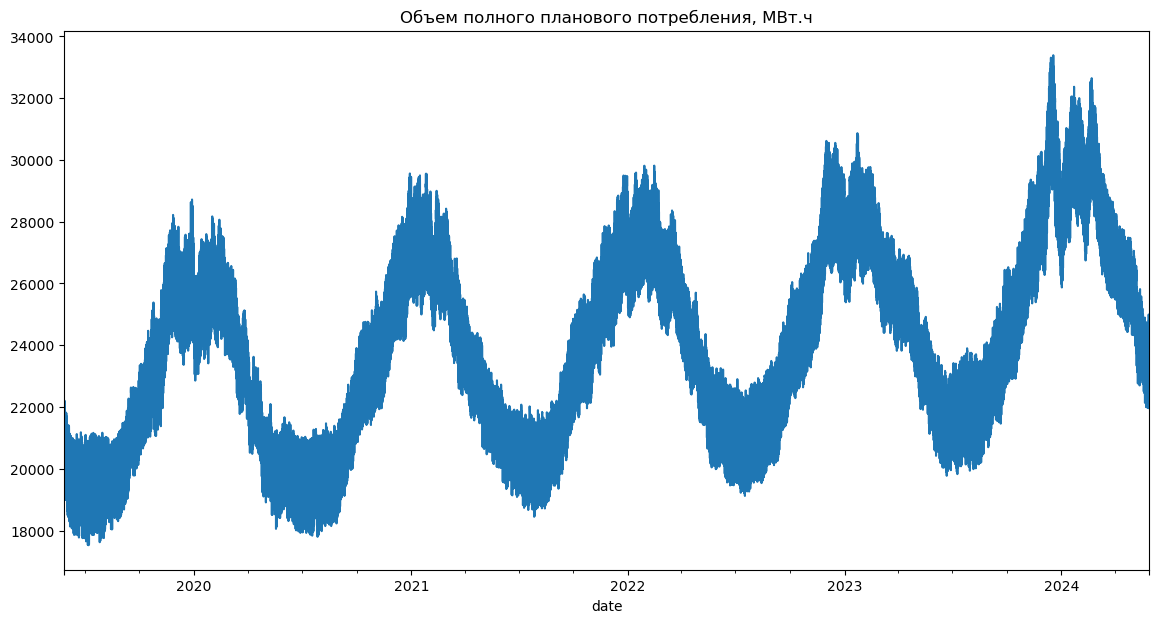

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 7))
df['consumer_volume'].plot()
plt.title('Объем полного планового потребления, МВт.ч')
plt.show()

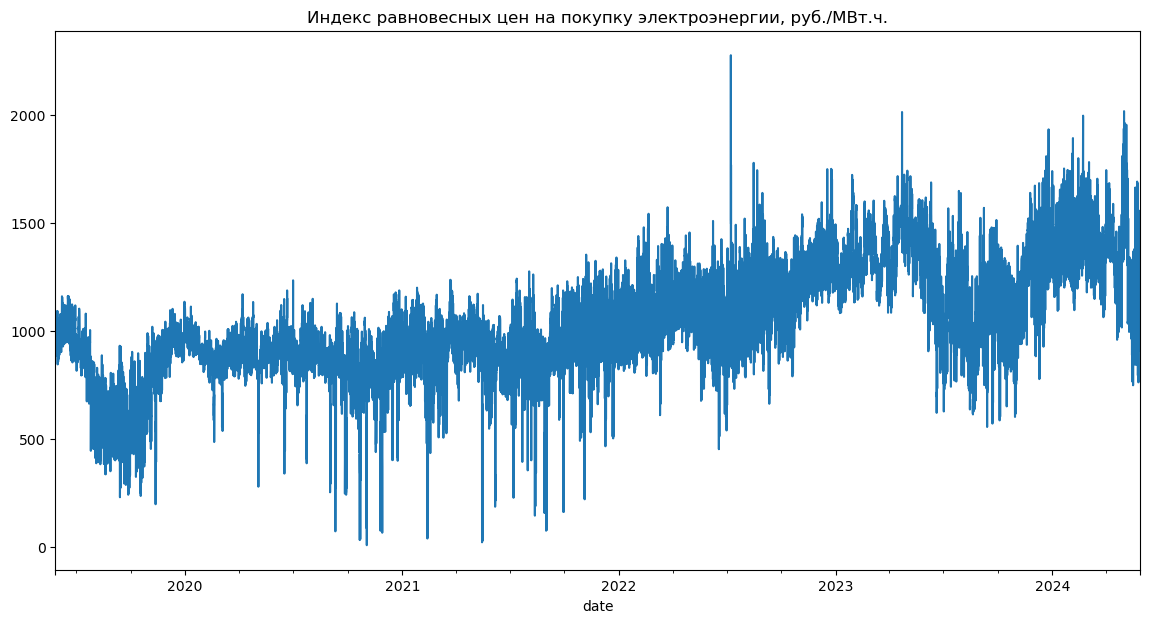

In [28]:
plt.figure(figsize = (14, 7))
df['consumer_price'].plot()
plt.title('Индекс равновесных цен на покупку электроэнергии, руб./МВт.ч.')
plt.show()

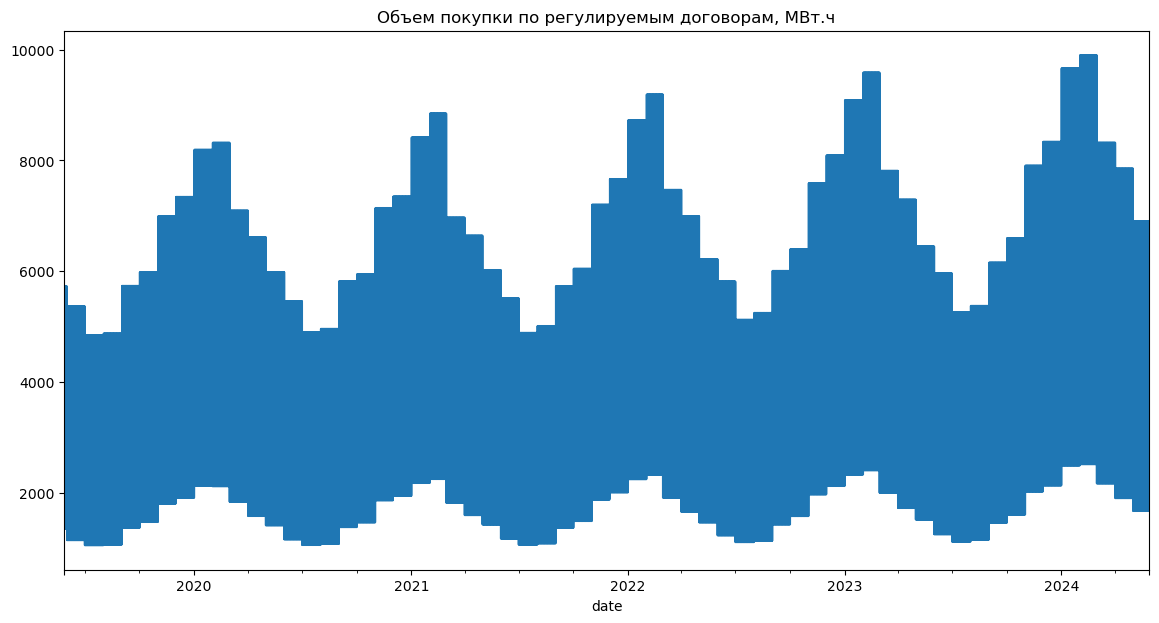

In [29]:
plt.figure(figsize = (14, 7))
df['consumer_rd_volume'].plot()
plt.title('Объем покупки по регулируемым договорам, МВт.ч')
plt.show()

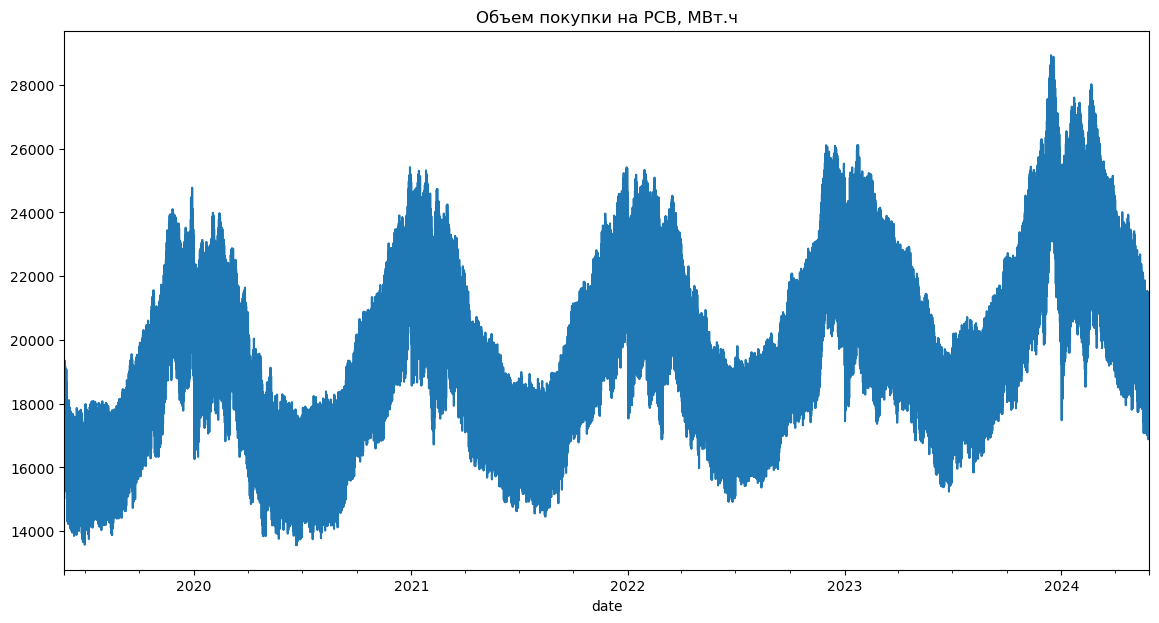

In [30]:
plt.figure(figsize = (14, 7))
df['consumer_spot_volume'].plot()
plt.title('Объем покупки на РСВ, МВт.ч')
plt.show()

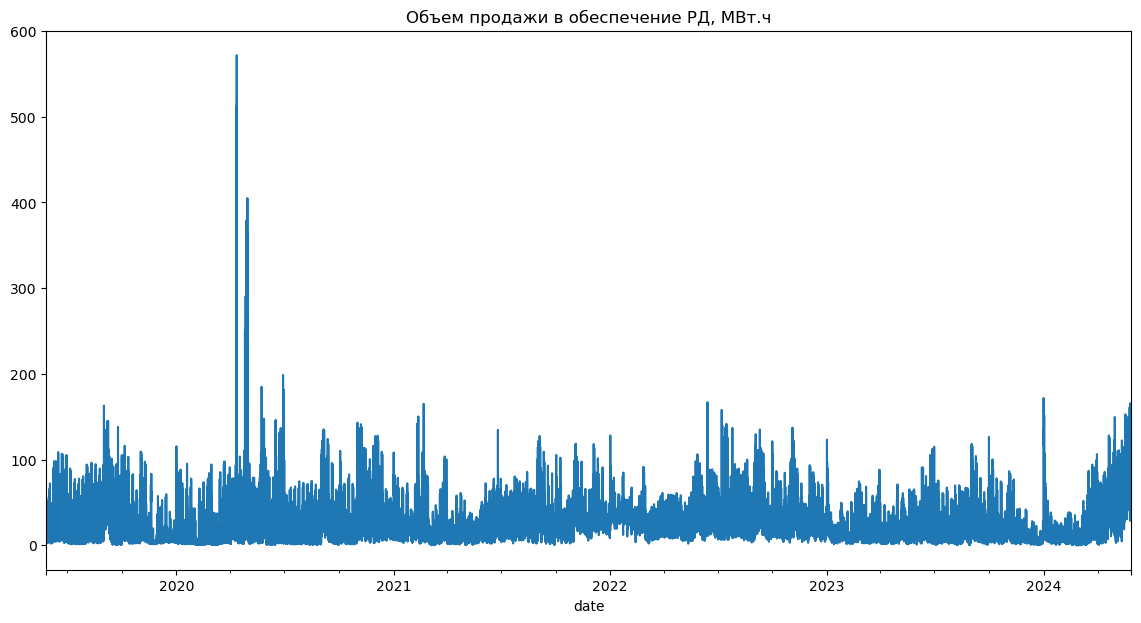

In [31]:
plt.figure(figsize = (14, 7))
df['consumer_provide_rd'].plot()
plt.title('Объем продажи в обеспечение РД, МВт.ч')
plt.show()

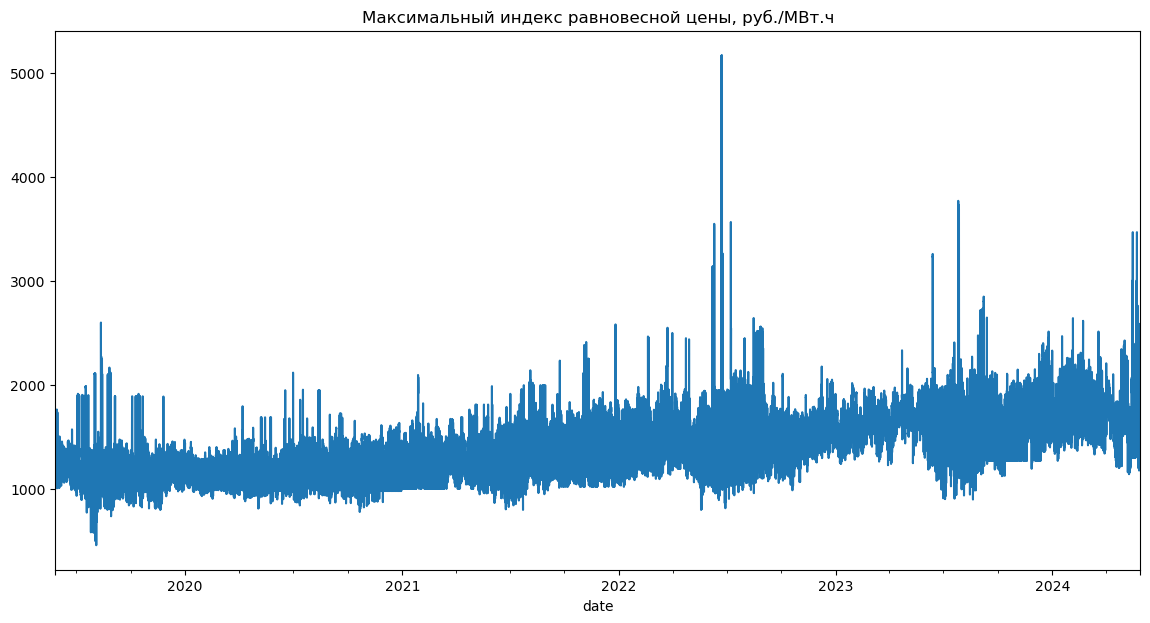

In [32]:
plt.figure(figsize = (14, 7))
df['consumer_max_price'].plot()
plt.title('Максимальный индекс равновесной цены, руб./МВт.ч')
plt.show()

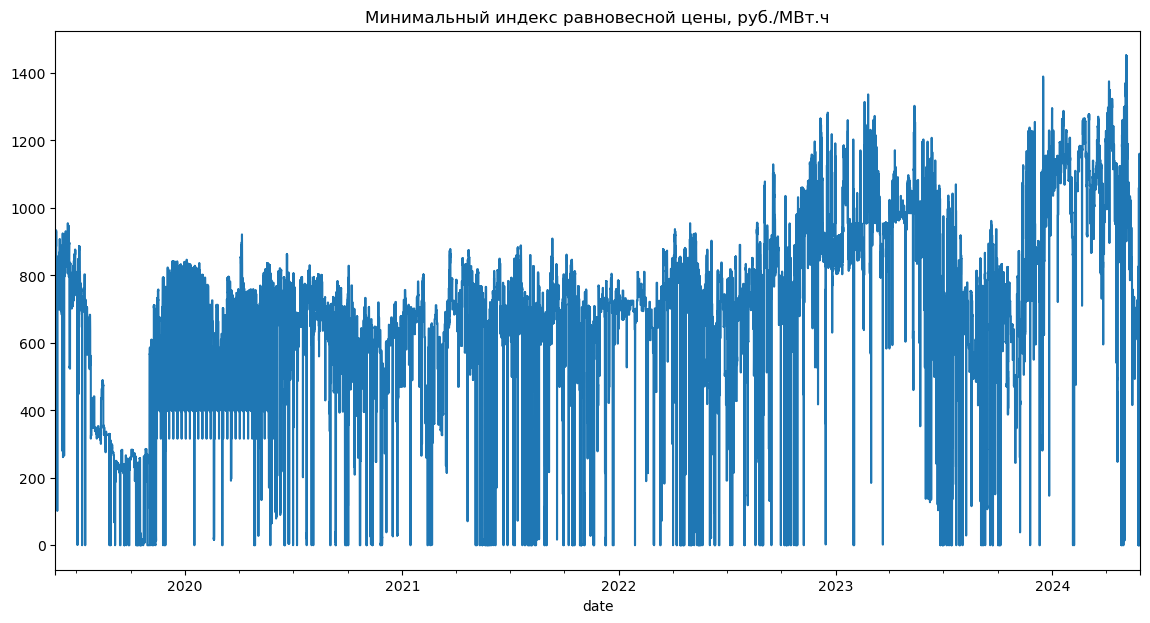

In [33]:
plt.figure(figsize = (14, 7))
df['consumer_min_price'].plot()
plt.title('Минимальный индекс равновесной цены, руб./МВт.ч')
plt.show()

### Supplier-related features plots

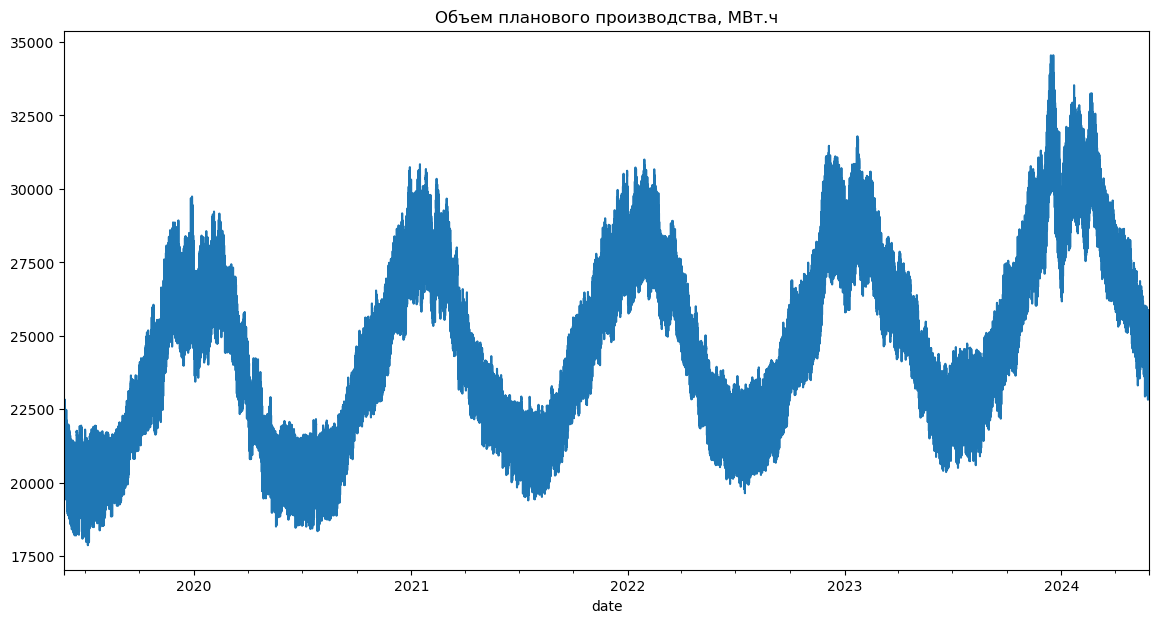

In [34]:
plt.figure(figsize = (14, 7))
df['supplier_volume'].plot()
plt.title('Объем планового производства, МВт.ч')
plt.show()

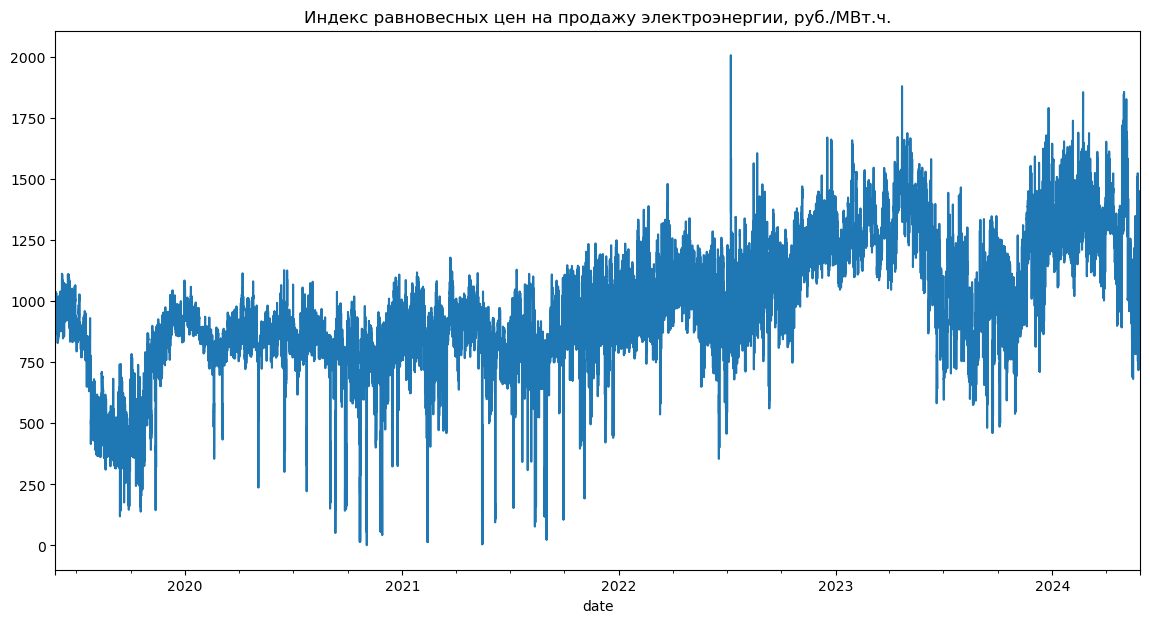

In [35]:
plt.figure(figsize = (14, 7))
df['supplier_price'].plot()
plt.title('Индекс равновесных цен на продажу электроэнергии, руб./МВт.ч.')
plt.show()

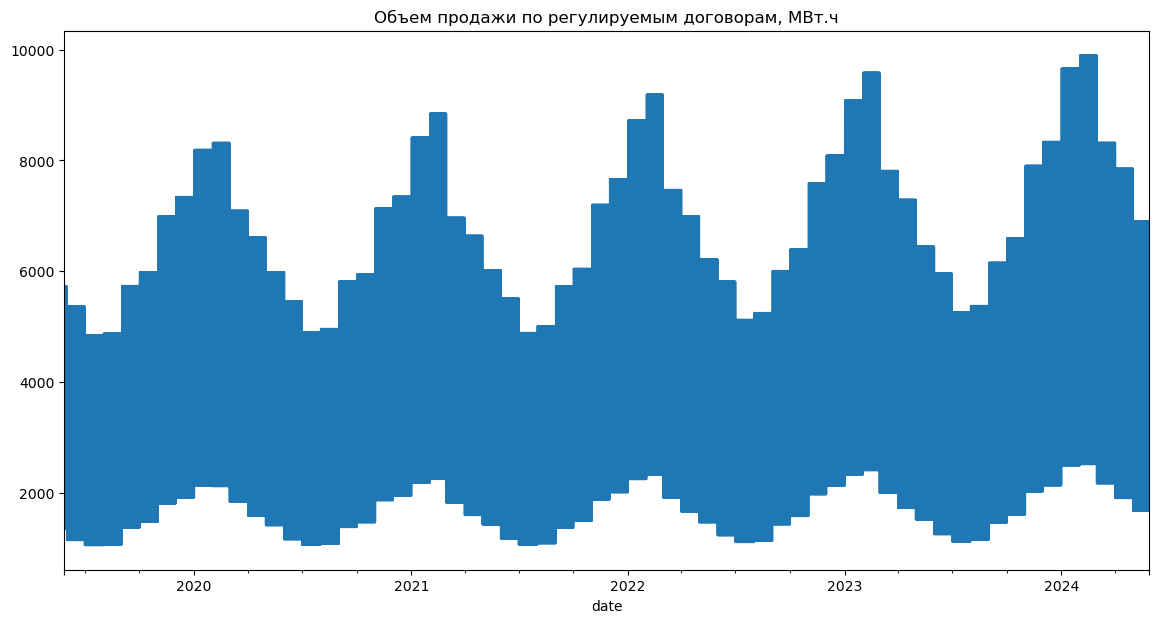

In [36]:
plt.figure(figsize = (14, 7))
df['supplier_rd_volume'].plot()
plt.title('Объем продажи по регулируемым договорам, МВт.ч')
plt.show()

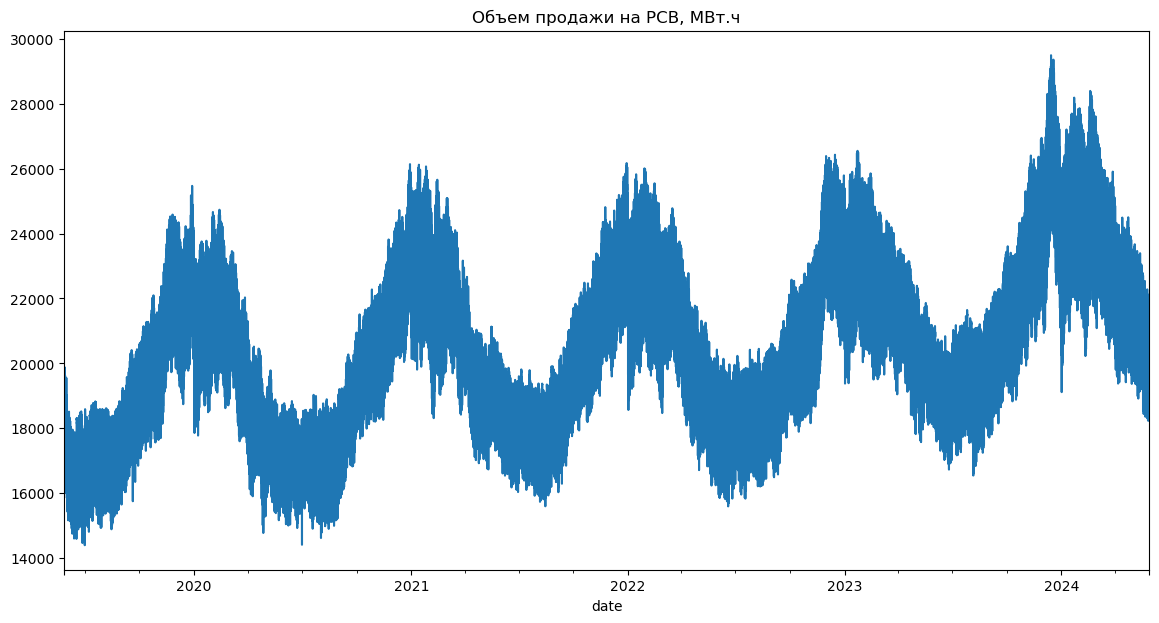

In [37]:
plt.figure(figsize = (14, 7))
df['supplier_spot_volume'].plot()
plt.title('Объем продажи на РСВ, МВт.ч')
plt.show()

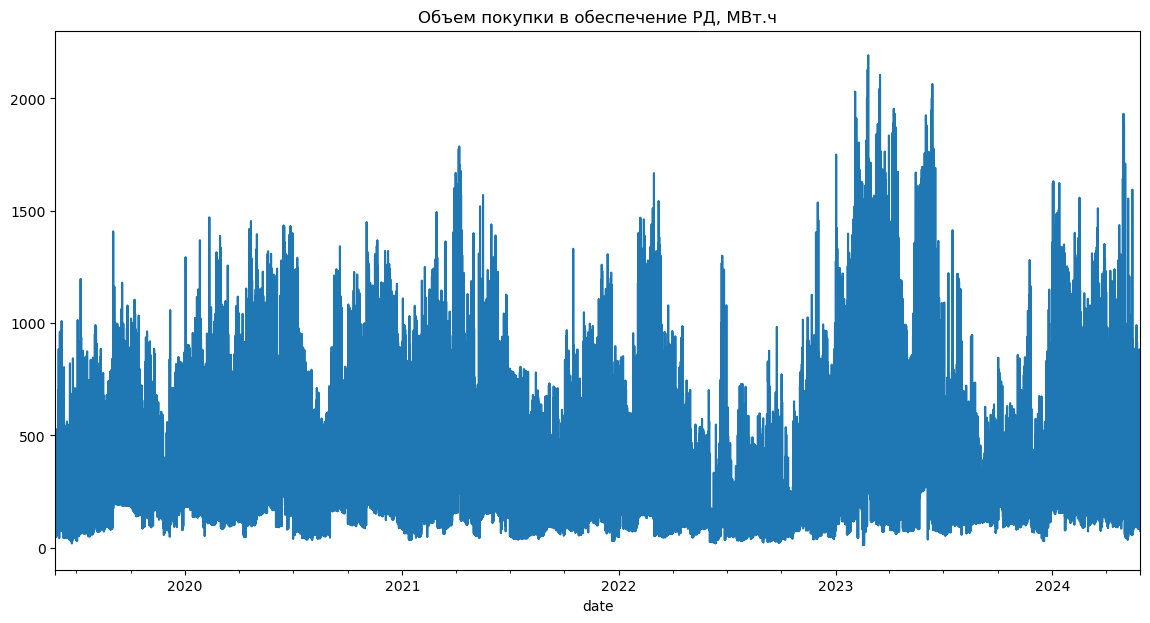

In [38]:
plt.figure(figsize = (14, 7))
df['supplier_provide_rd'].plot()
plt.title('Объем покупки в обеспечение РД, МВт.ч')
plt.show()

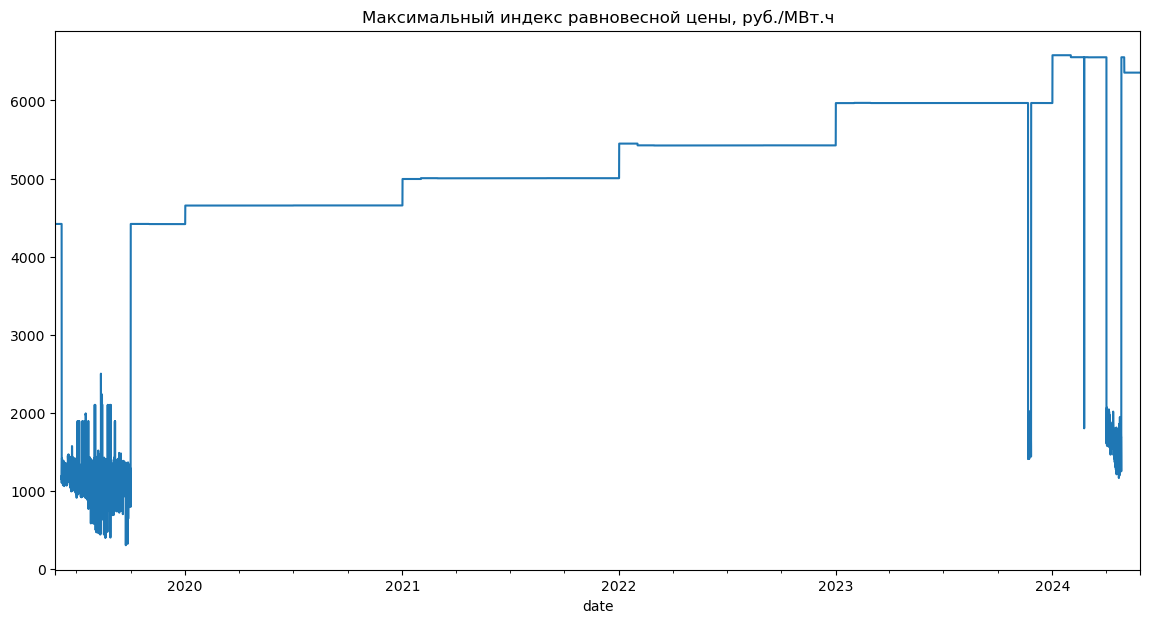

In [39]:
plt.figure(figsize = (14, 7))
df['supplier_max_price'].plot()
plt.title('Максимальный индекс равновесной цены, руб./МВт.ч')
plt.show()

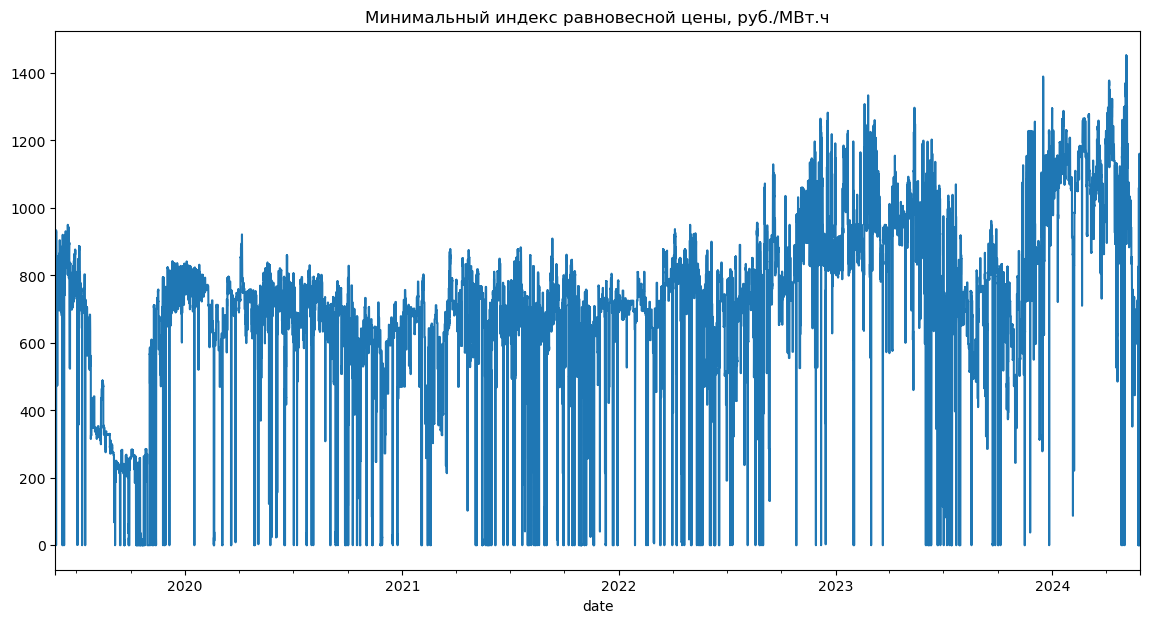

In [40]:
plt.figure(figsize = (14, 7))
df['supplier_min_price'].plot()
plt.title('Минимальный индекс равновесной цены, руб./МВт.ч')
plt.show()

### Histograms

<Figure size 1400x700 with 0 Axes>

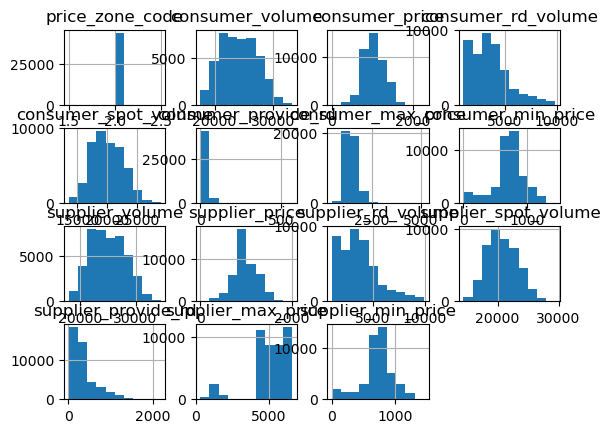

In [41]:
def plot_dataset_histograms(df):
    plt.figure(figsize = (14, 7))
    df.hist()
    plt.show()

plot_dataset_histograms(df)

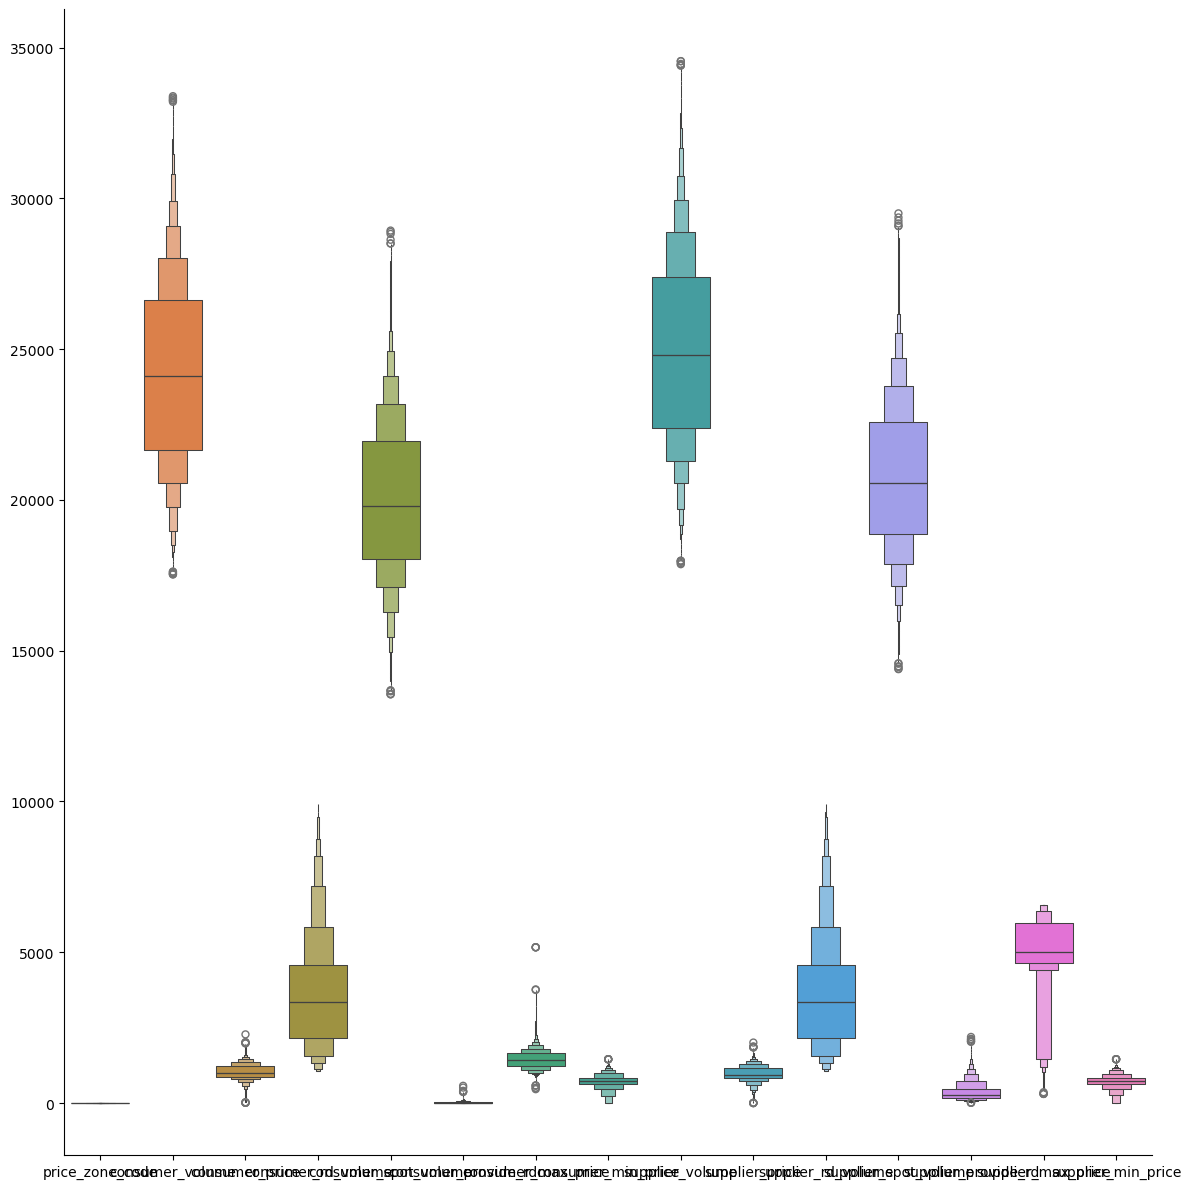

In [43]:
import seaborn as sb

def show_cat_plot(df):
    sb.catplot(df, kind = 'boxen', height = 12)
    plt.show()

show_cat_plot(df)

### Pair plot

<Figure size 2500x2500 with 0 Axes>

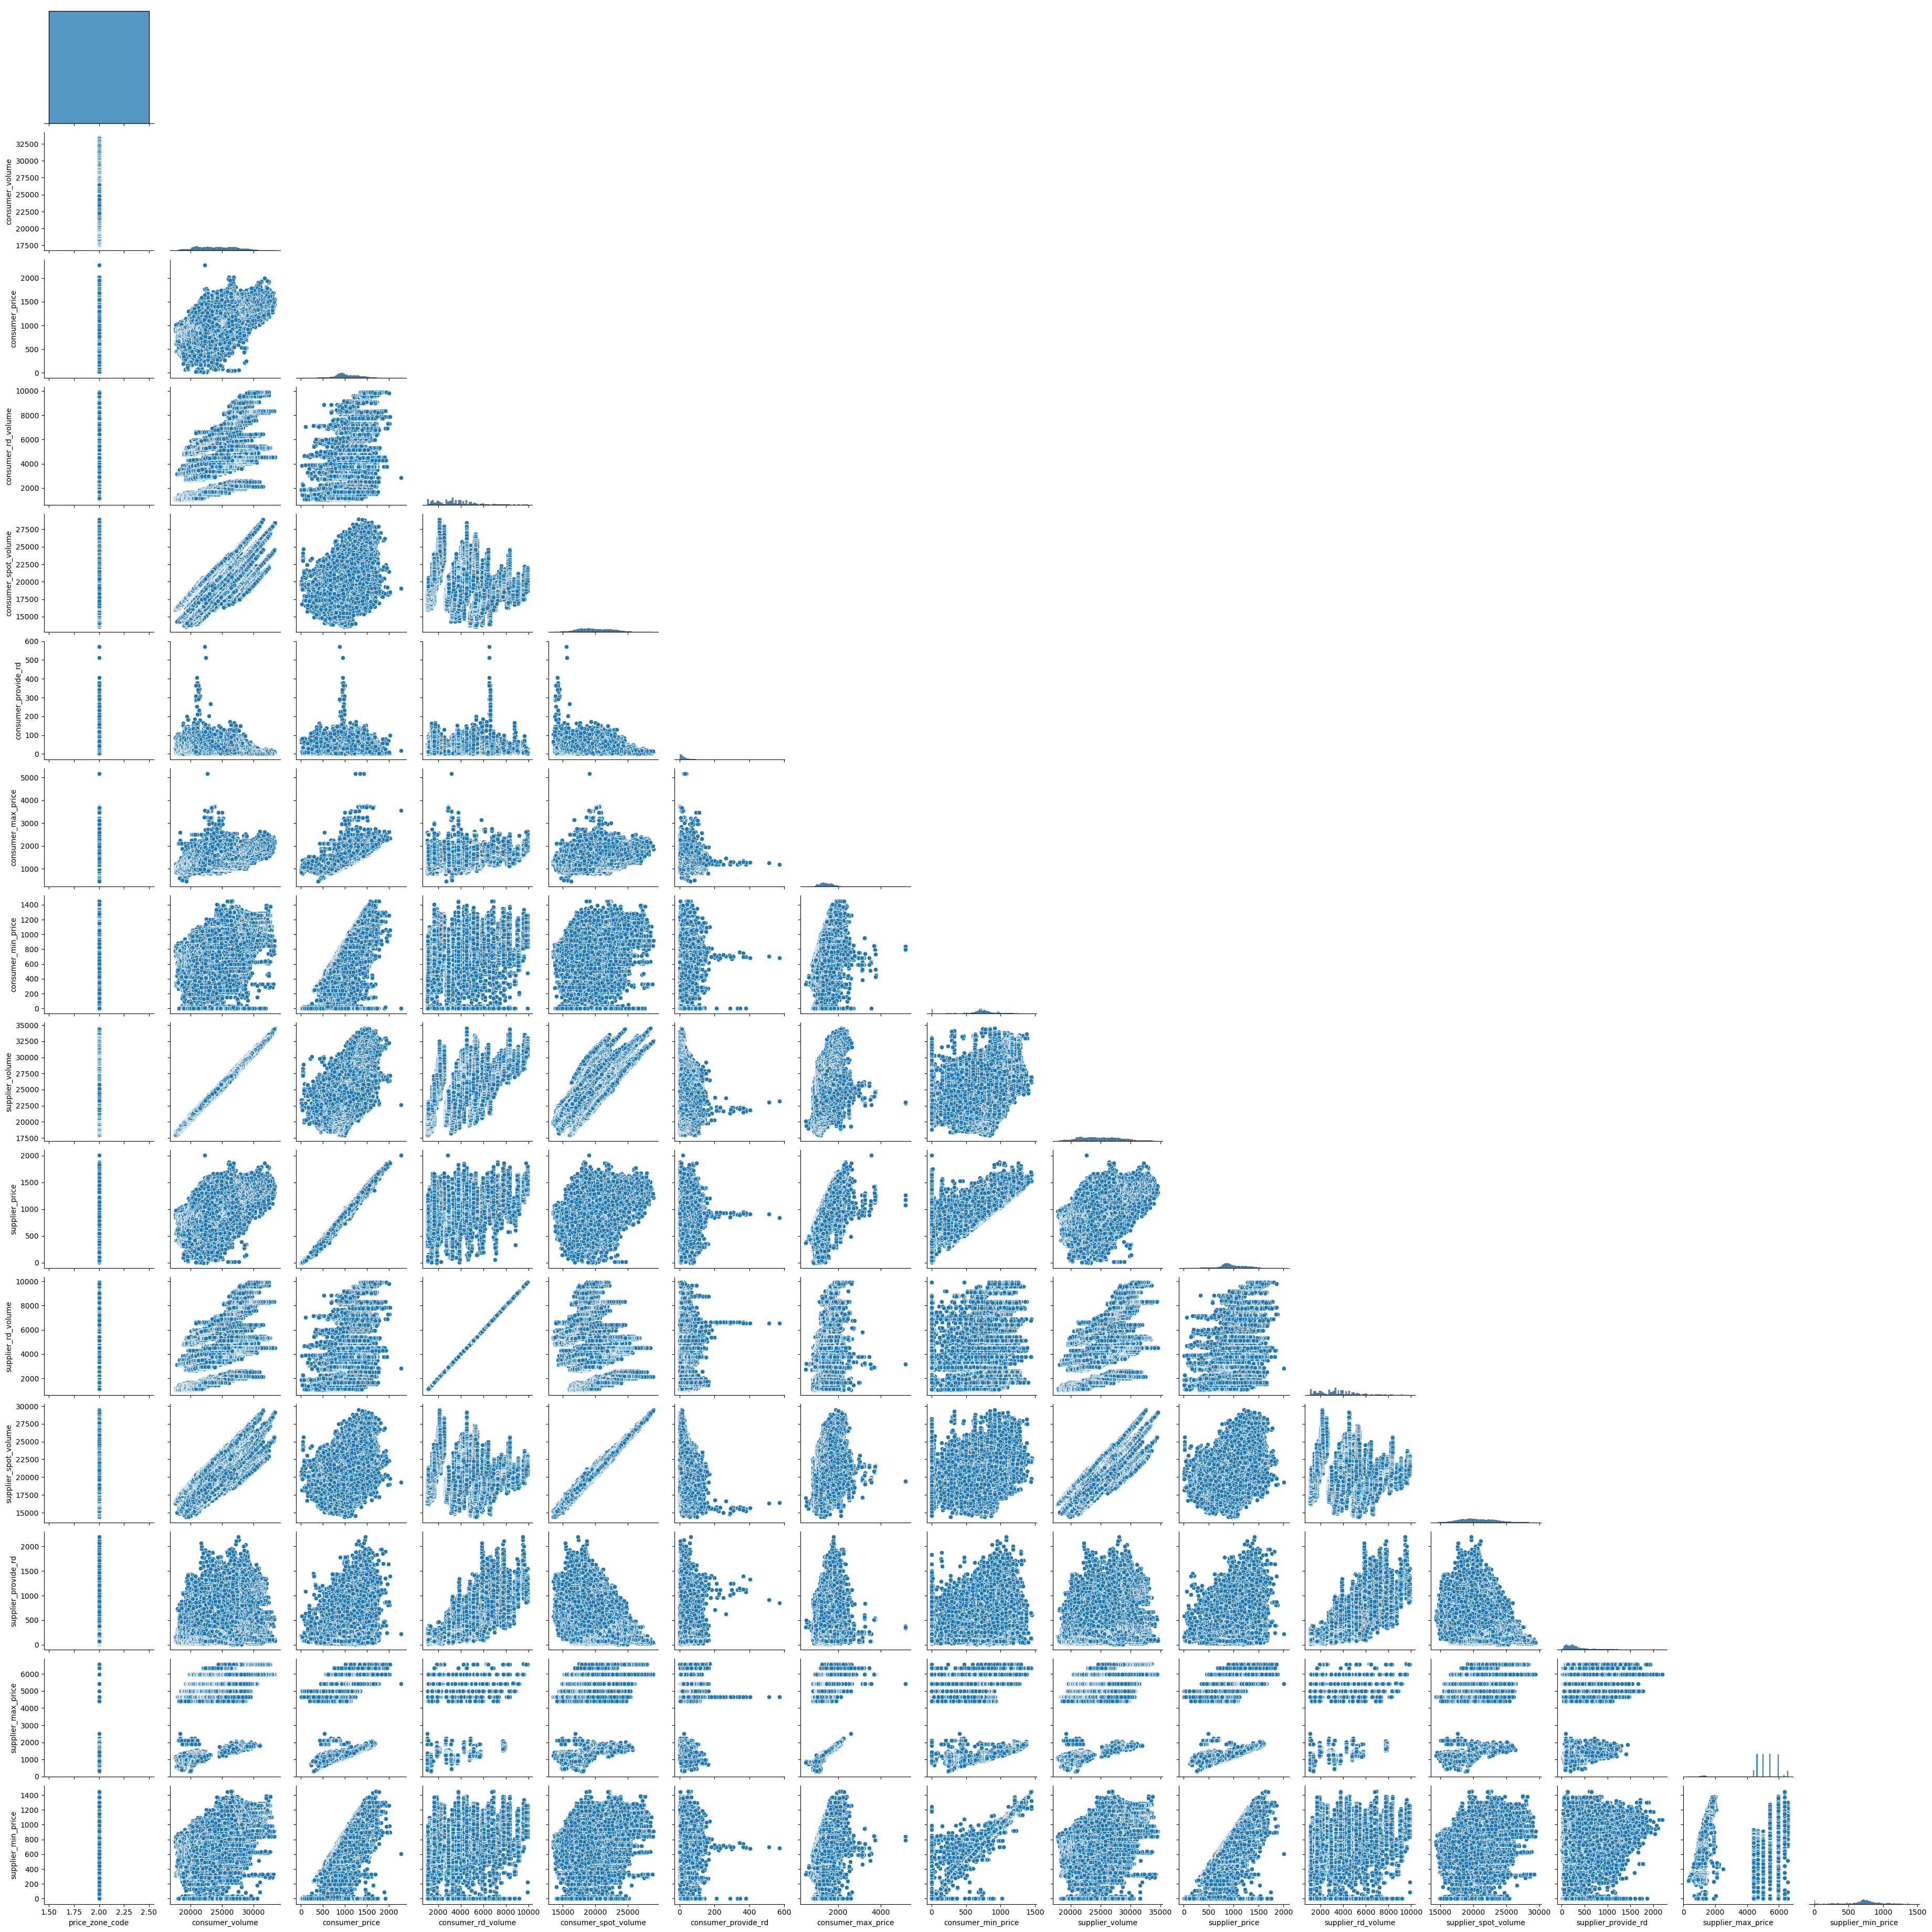

In [44]:
def show_pair_plot(df, figure_size = (15, 15), target_name = None):
    plt.figure(figsize = figure_size)
    df_without_object_columns = df.select_dtypes(exclude = ['object'])
    if target_name != None:
        sb.pairplot(df_without_object_columns, corner = True, palette = 'tab10', hue = target_name)
    else:
        sb.pairplot(df_without_object_columns, corner = True)
    plt.show()
    
show_pair_plot(df, figure_size = (25, 25))

### Correlation map

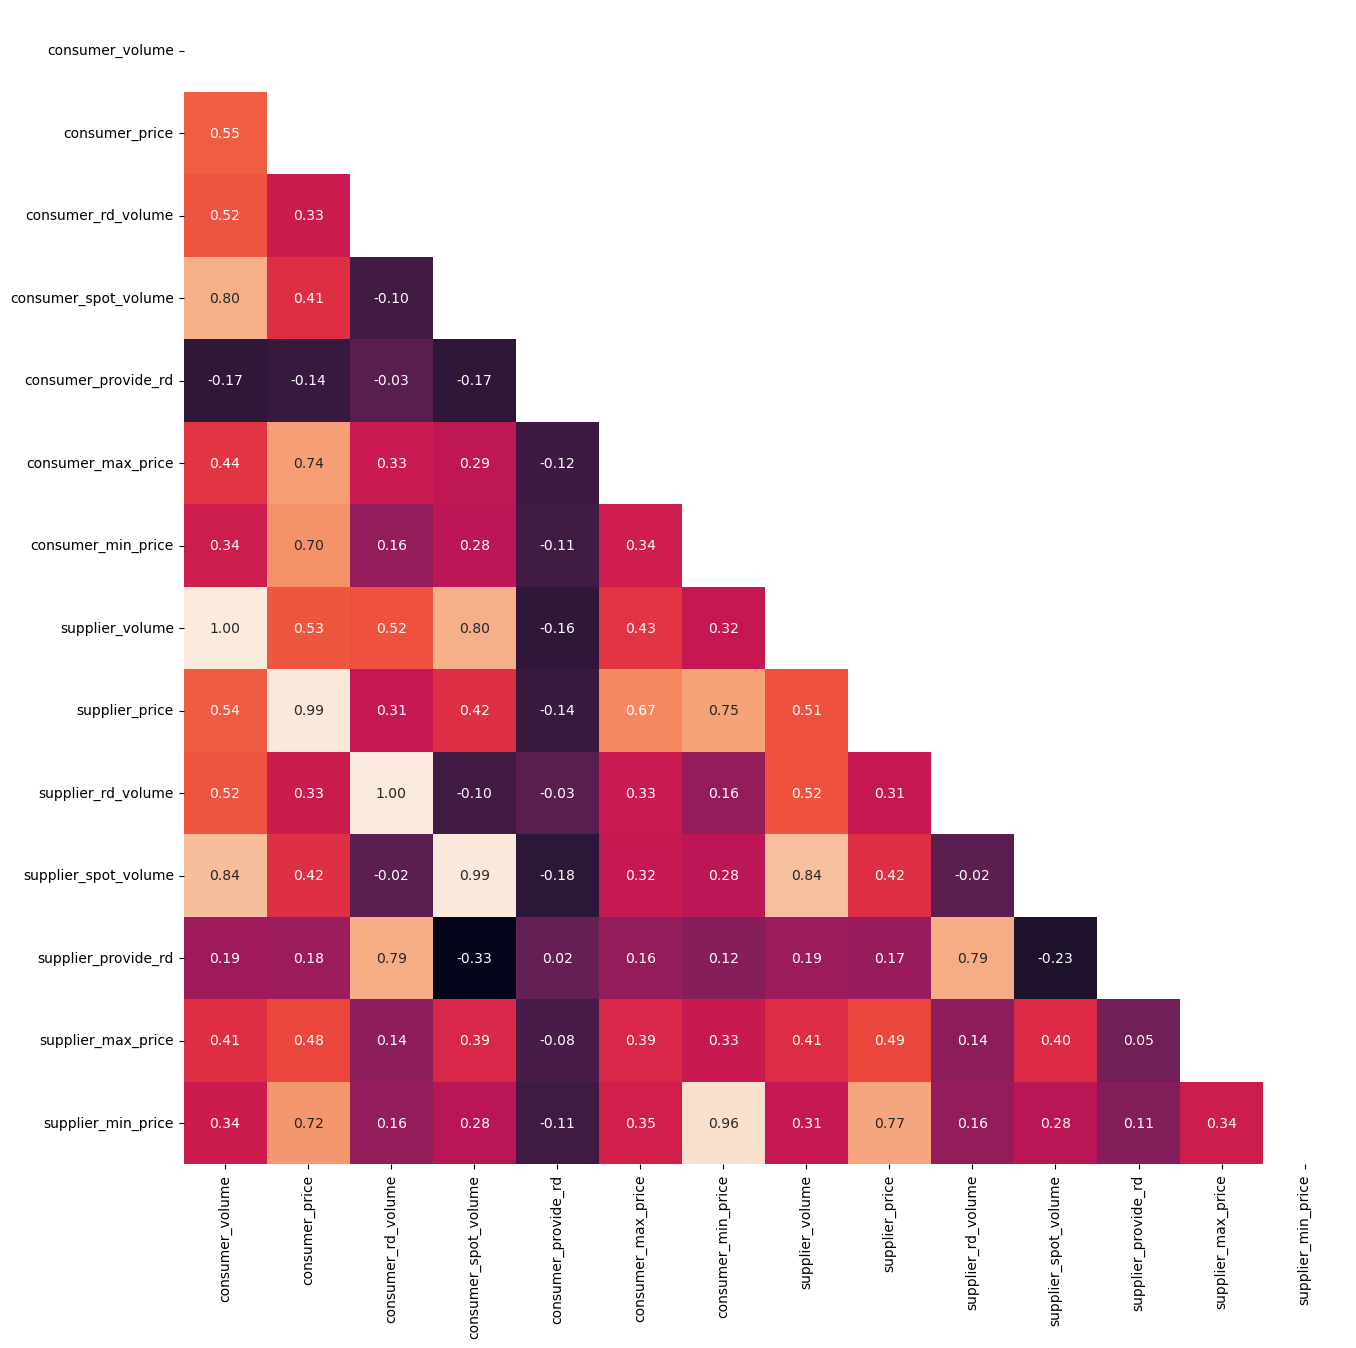

In [45]:
import numpy as np

def show_correlation_map(df, figure_size = (15, 15)):
    plt.figure(figsize = figure_size)
    corr_matrix = df.select_dtypes(exclude = ['object']).corr()
    lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k = -1).astype(np.bool_))
    sb.heatmap(
        lower,
        annot = True,
        fmt = '.2f',
        cbar = False)
    plt.show()

show_correlation_map(df.drop(columns = 'price_zone_code'))

### Autocorretalion

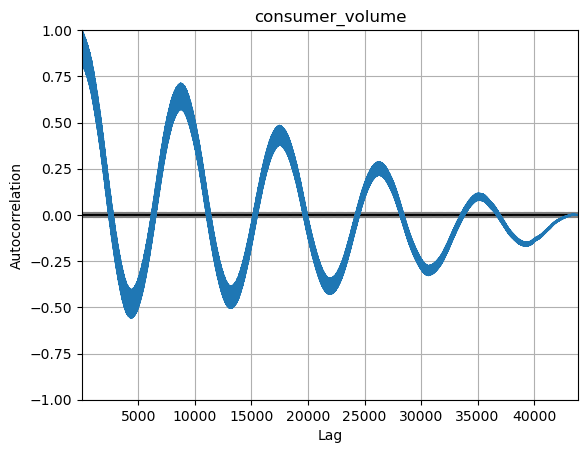

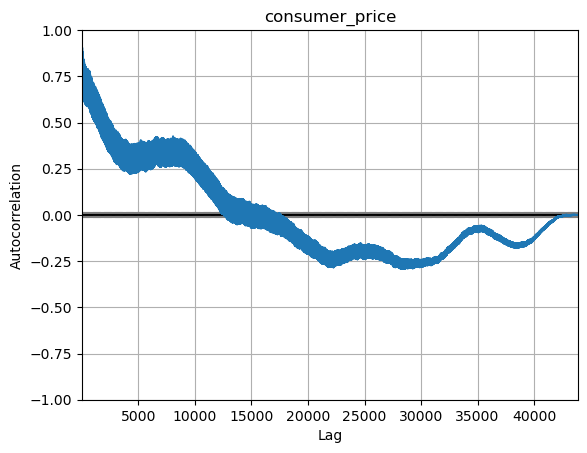

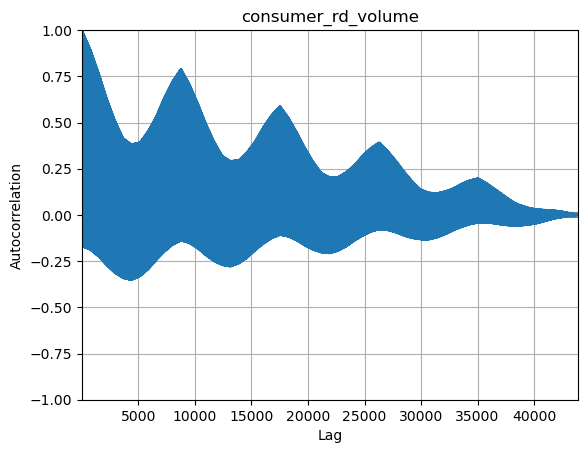

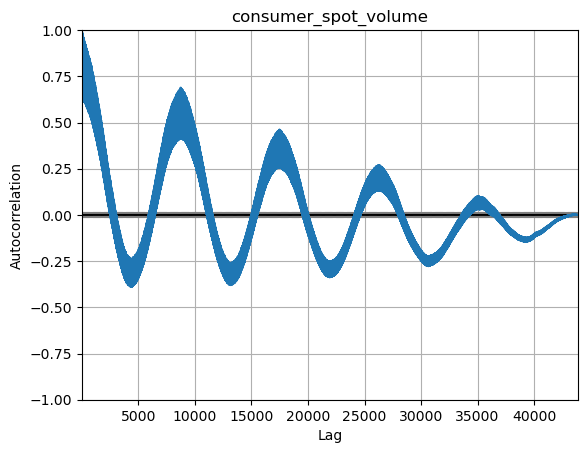

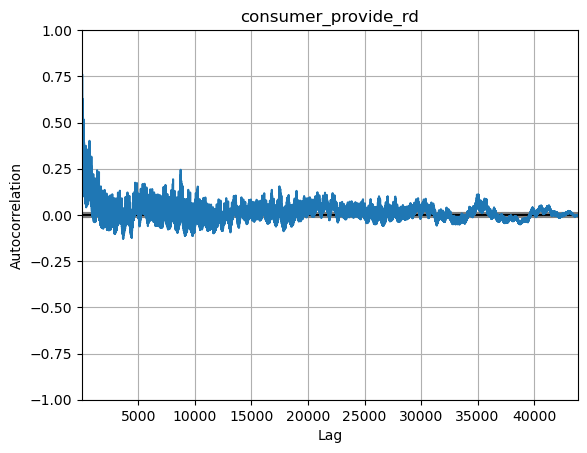

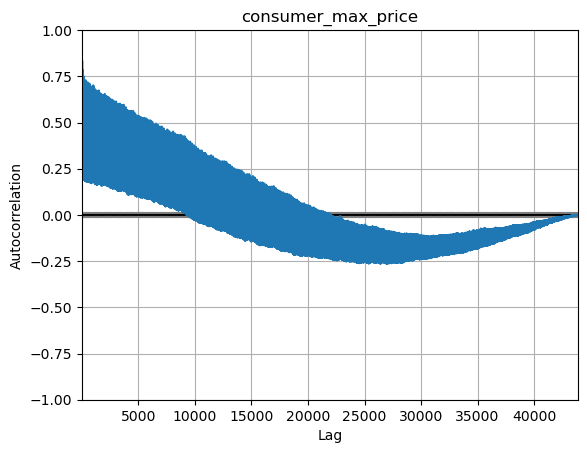

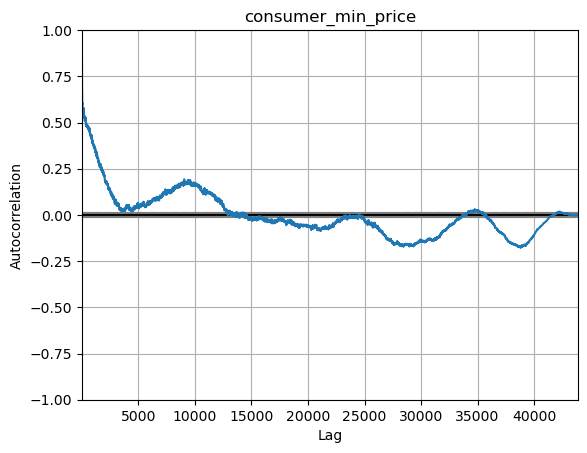

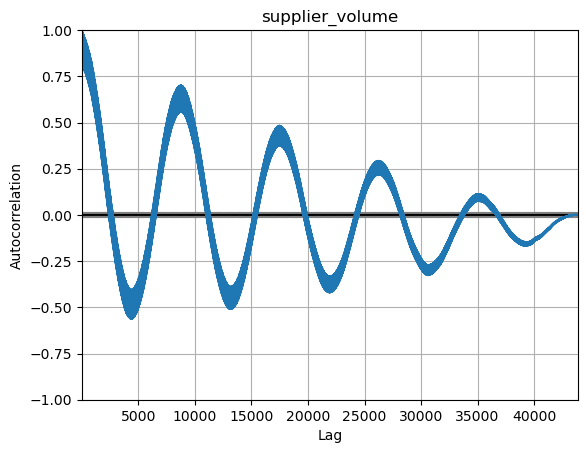

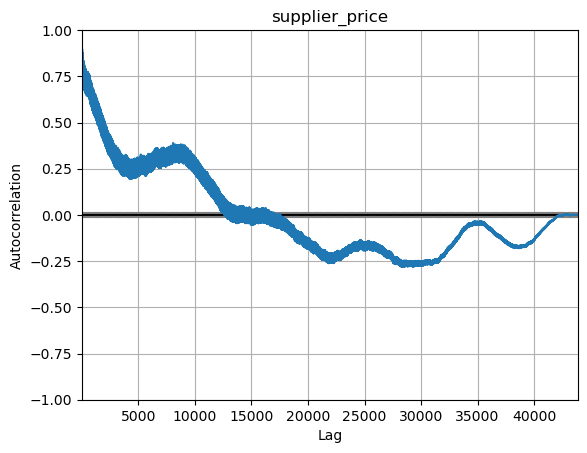

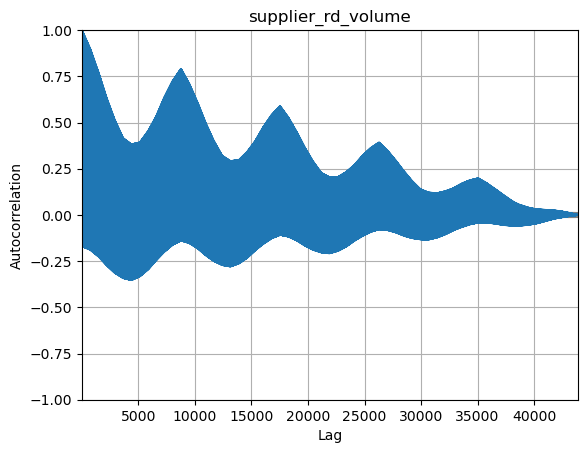

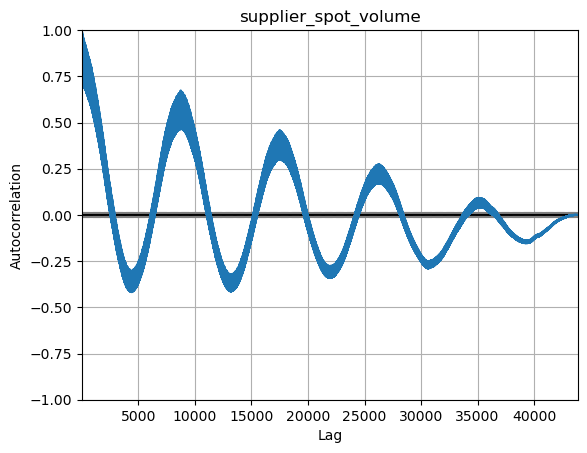

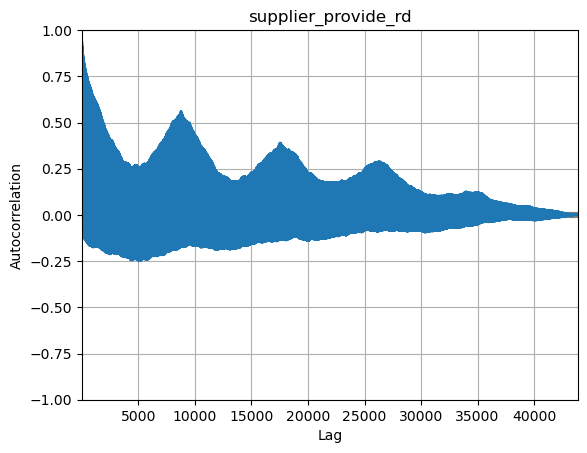

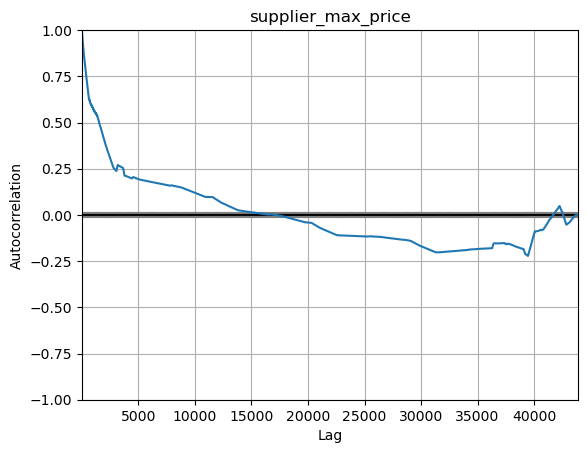

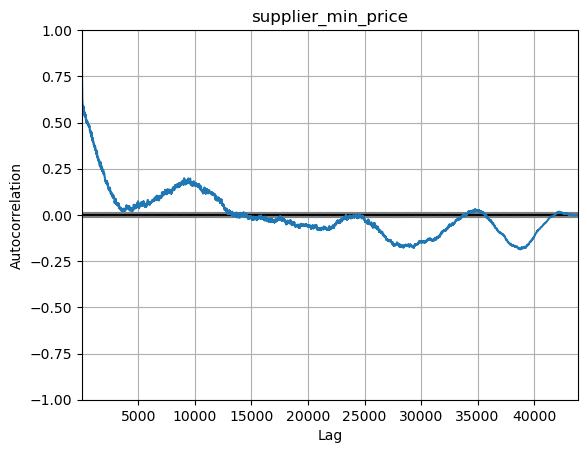

In [5]:
from pandas.plotting import autocorrelation_plot

def make_acf_plots(df):
    for column in df:
        if df[column].dtypes == 'object':
            continue
        autocorrelation_plot(df[column].to_numpy())
        plt.title(column)
        plt.show()

make_acf_plots(df.drop(columns = 'price_zone_code'))

### Partial autocorrelation

C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


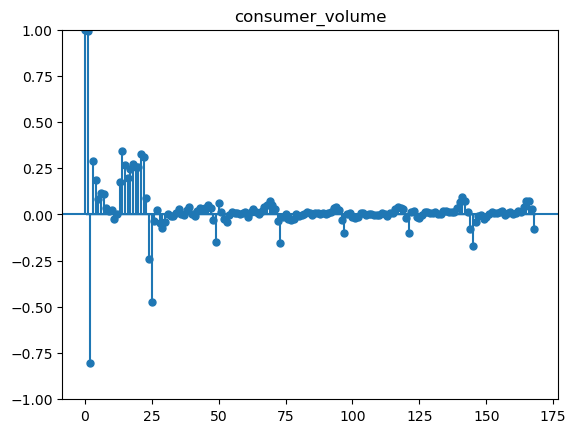

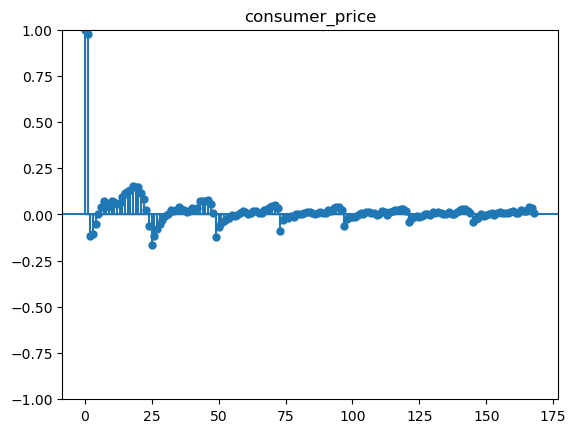

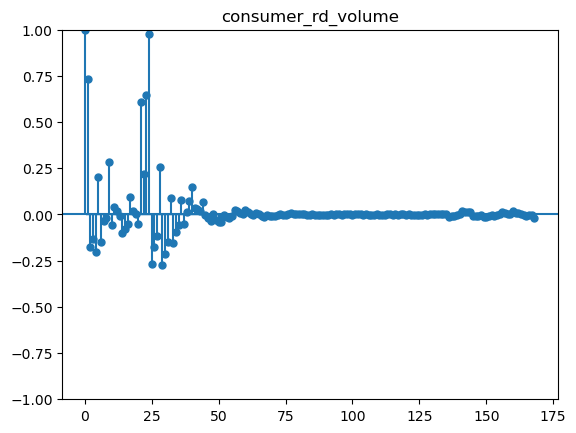

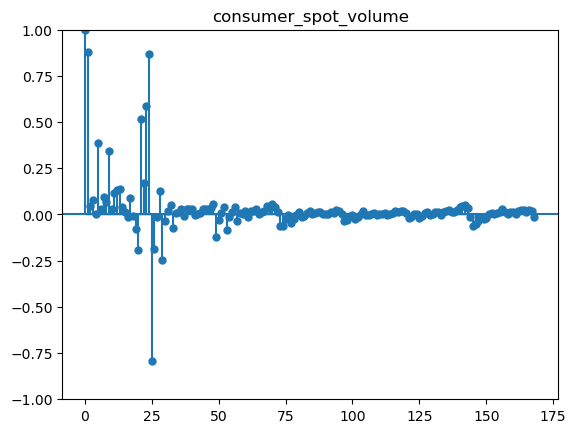

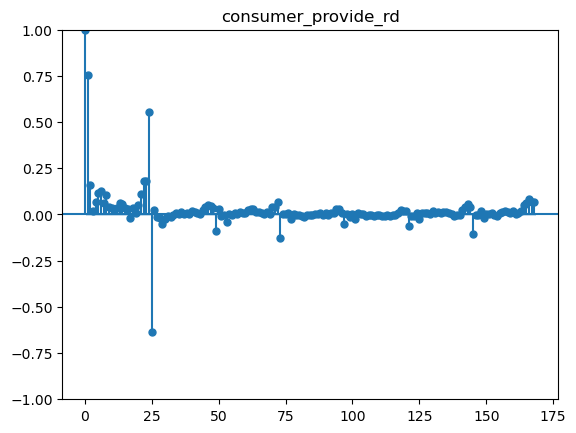

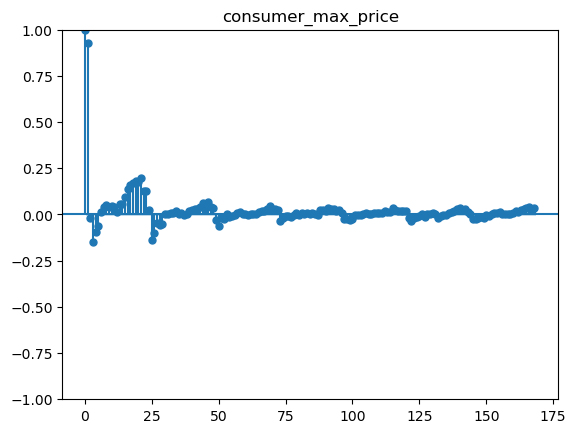

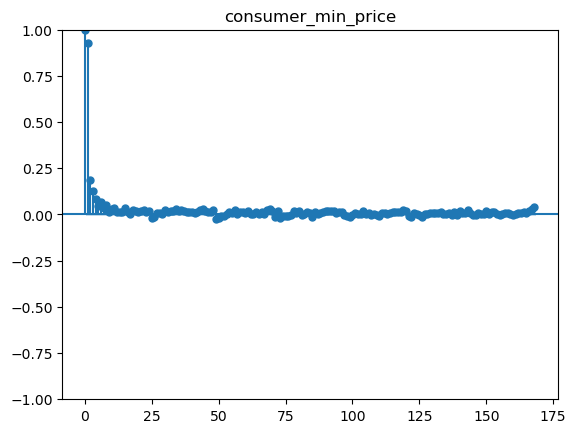

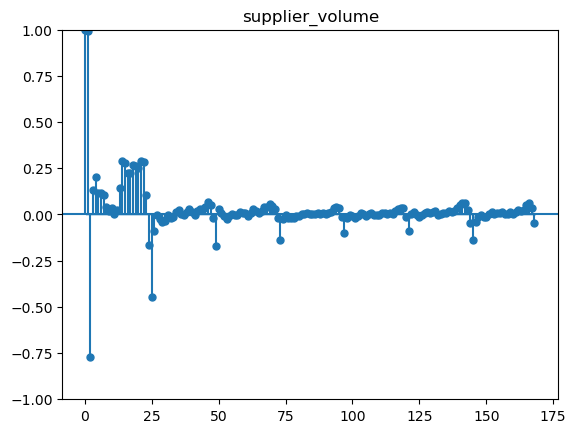

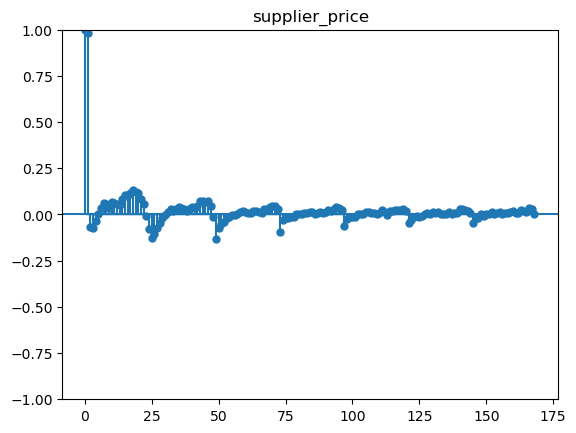

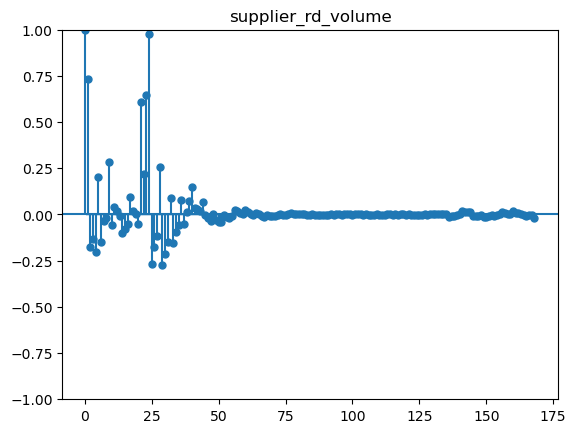

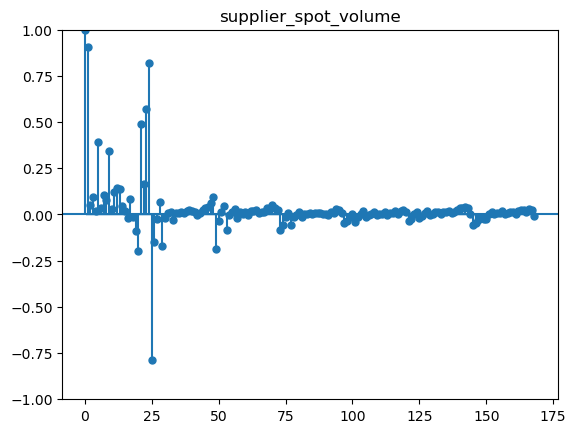

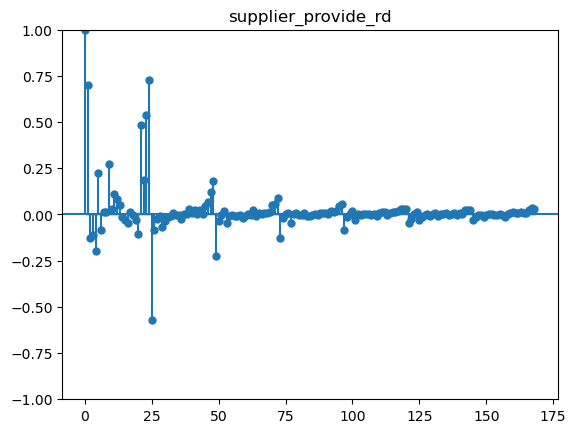

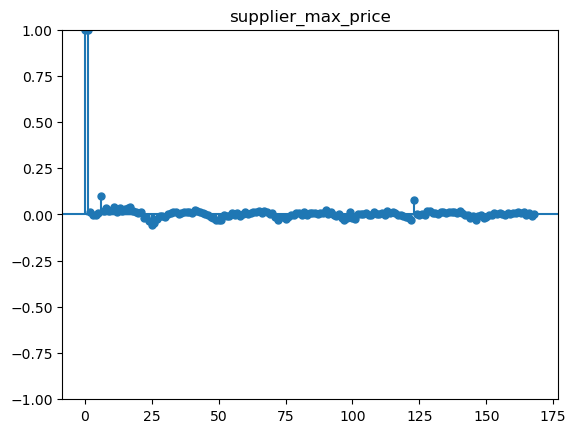

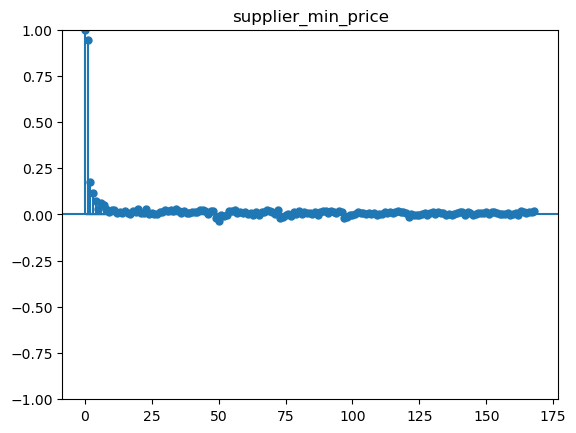

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf

def make_pacf_plots(df):
    for column in df:
        if df[column].dtypes == 'object':
            continue
        plot_pacf(
            df[column].to_numpy(),
            lags = 24 * 7,
            title = column)
        plt.show()     

make_pacf_plots(df.drop(columns = 'price_zone_code'))

### Seasonal decomposition of the features

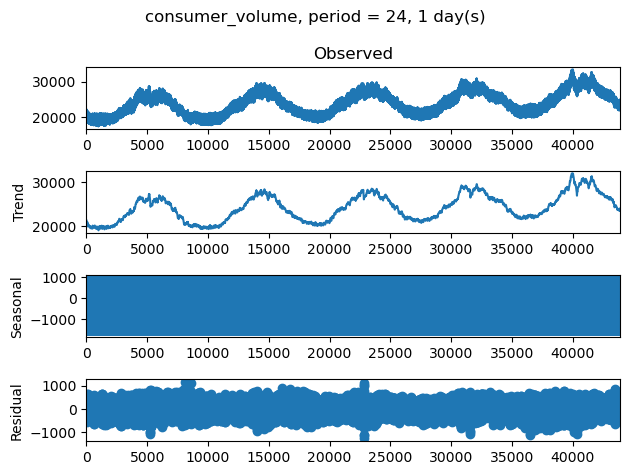

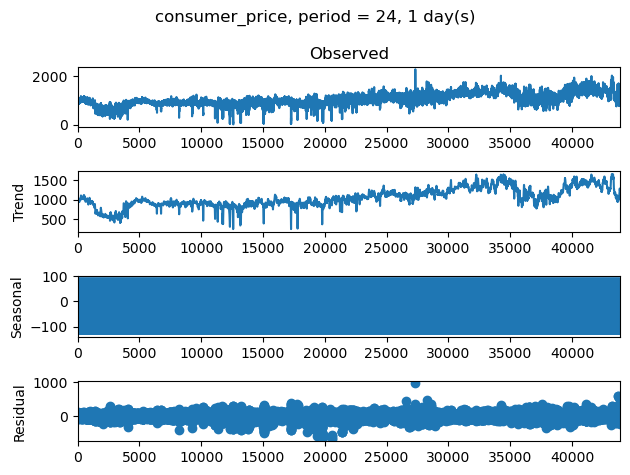

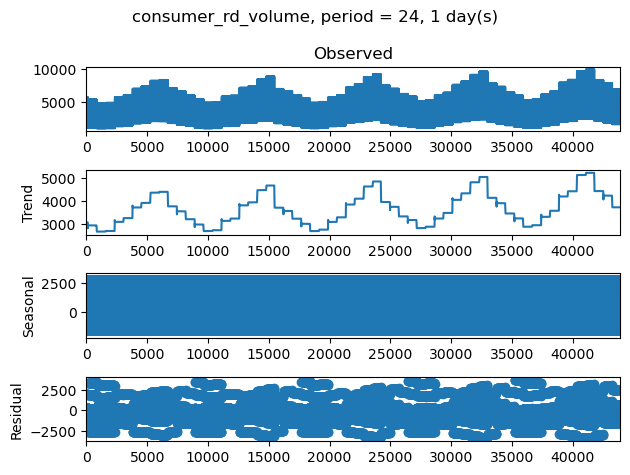

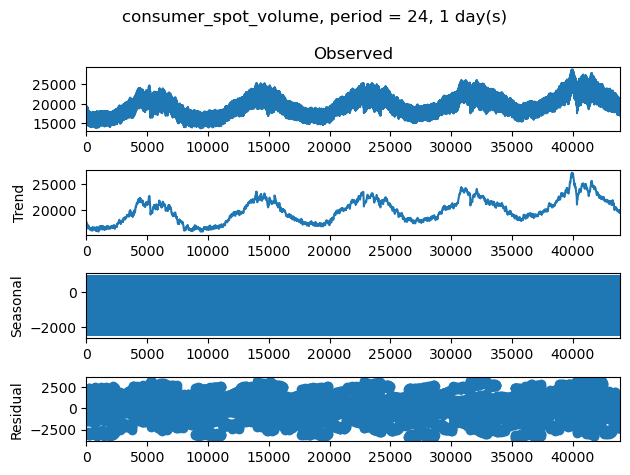

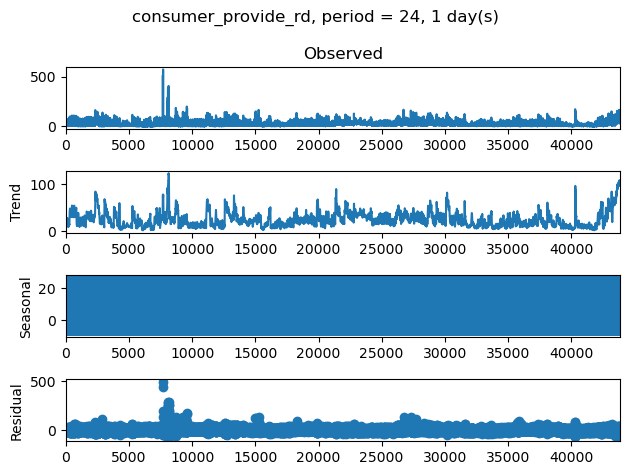

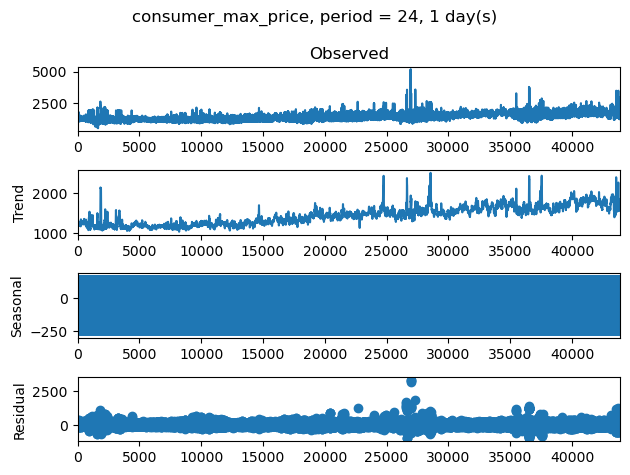

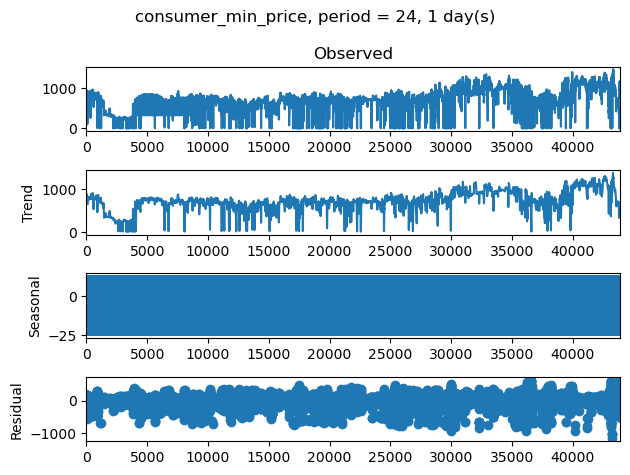

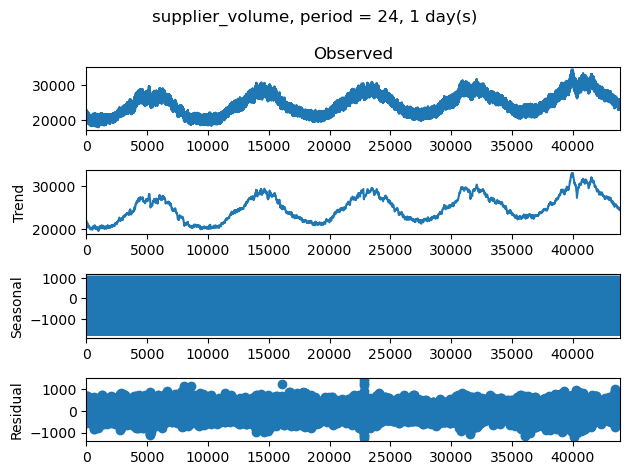

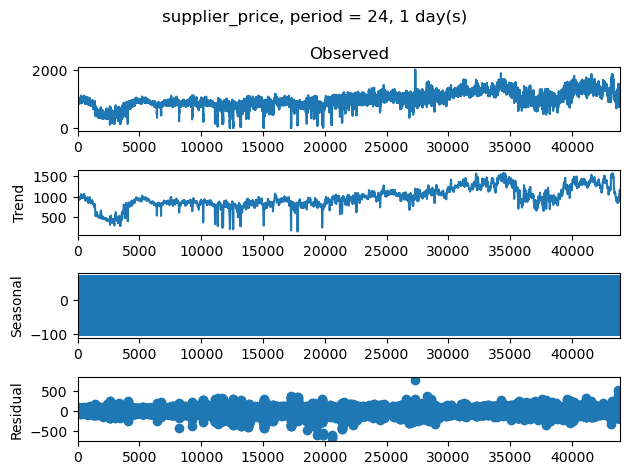

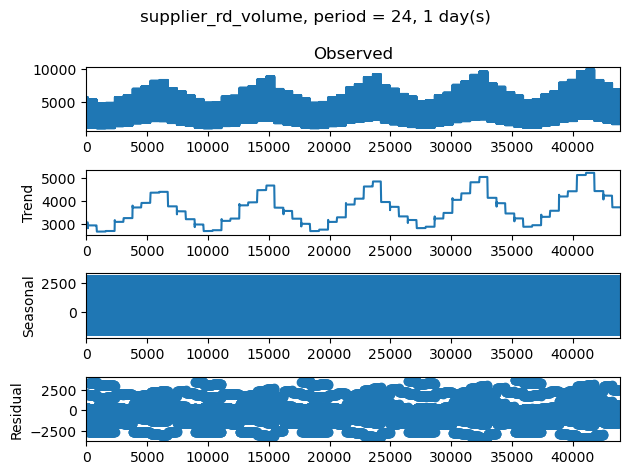

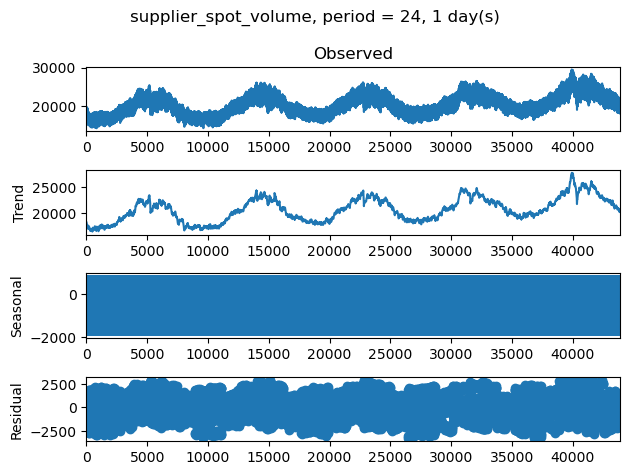

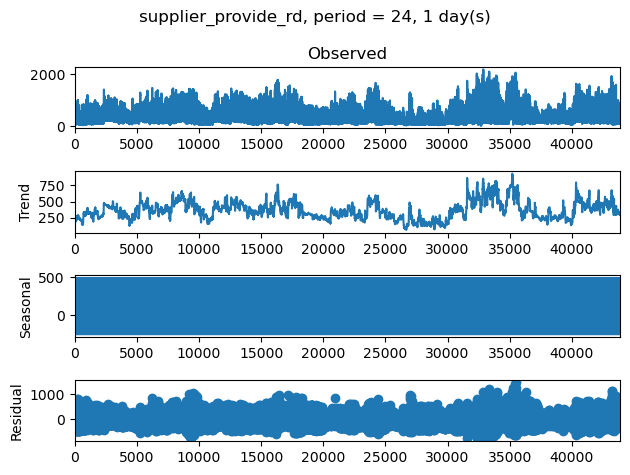

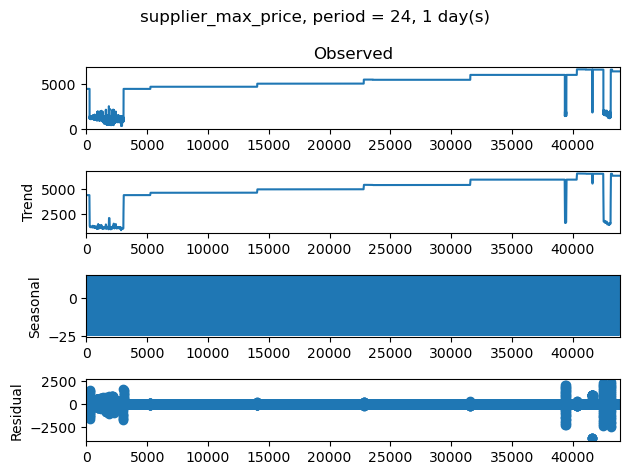

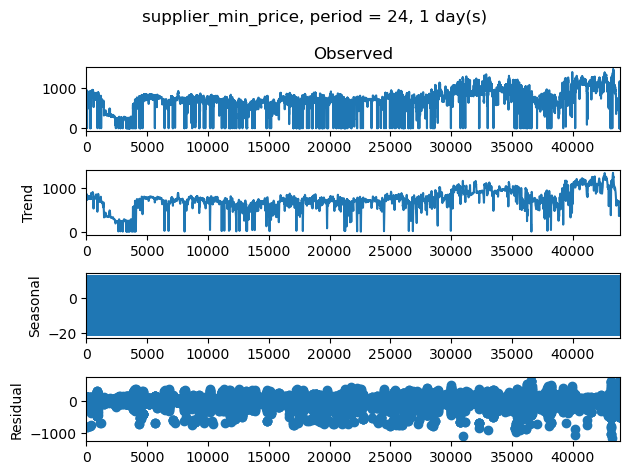

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def make_seasonal_decomposition_plots(df, period):
    for column in df:
        if df[column].dtypes == 'object':
            continue
        result = seasonal_decompose(
            df[column].to_numpy(),
            period = period,
            model ='additive'
        )
        result.plot()
        plt.suptitle(f'{column}, period = {period}, {round(period / 24, 2)} day(s)')
        plt.tight_layout()
        plt.show()
        
period = 24
make_seasonal_decomposition_plots(
    df.drop(columns = 'price_zone_code'),
    period = period
)

### Attempt to find out the seasonality of the suppliers' clearing price

In [3]:
import matplotlib.pyplot as plt

df_sup = df[['supplier_price']].copy()
df_sup

supplier_price
date                                     
2019-05-27 00:00:00+00:00          949.90
2019-05-27 01:00:00+00:00          942.20
2019-05-27 02:00:00+00:00          952.14
2019-05-27 03:00:00+00:00          944.93
2019-05-27 04:00:00+00:00          966.00
...                                   ...
2024-05-27 19:00:00+00:00         1227.36
2024-05-27 20:00:00+00:00         1010.99
2024-05-27 21:00:00+00:00          936.12
2024-05-27 22:00:00+00:00          900.28
2024-05-27 23:00:00+00:00          861.15

[43872 rows x 1 columns]

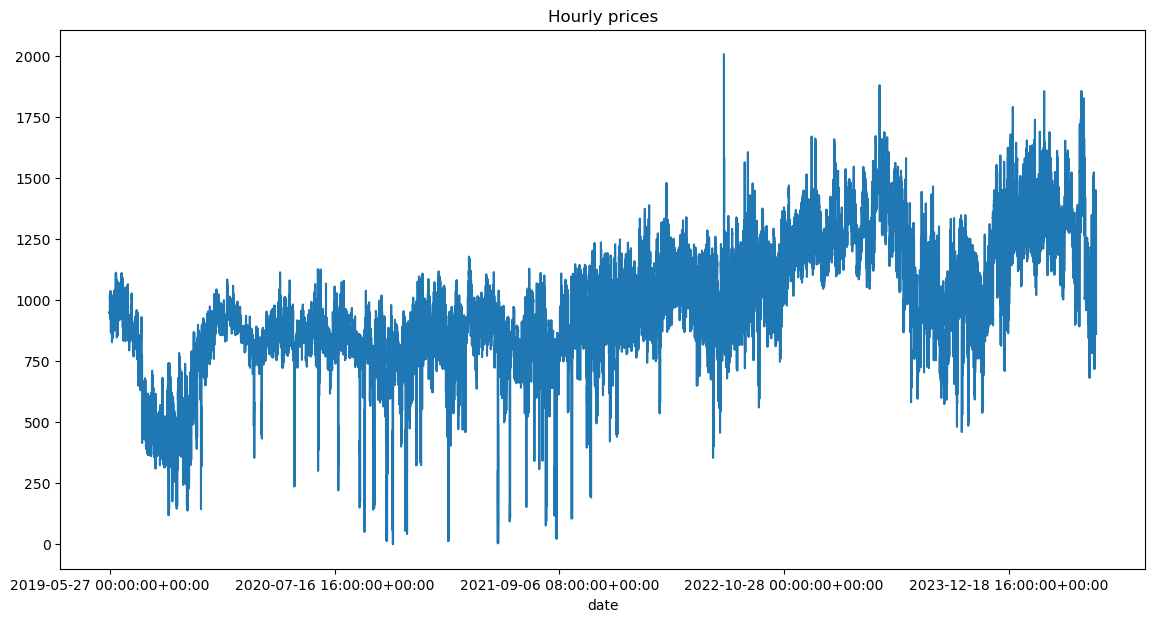

In [104]:
plt.figure(figsize = (14, 7))
df_sup['supplier_price'].plot()
plt.title('Hourly prices')
plt.show()

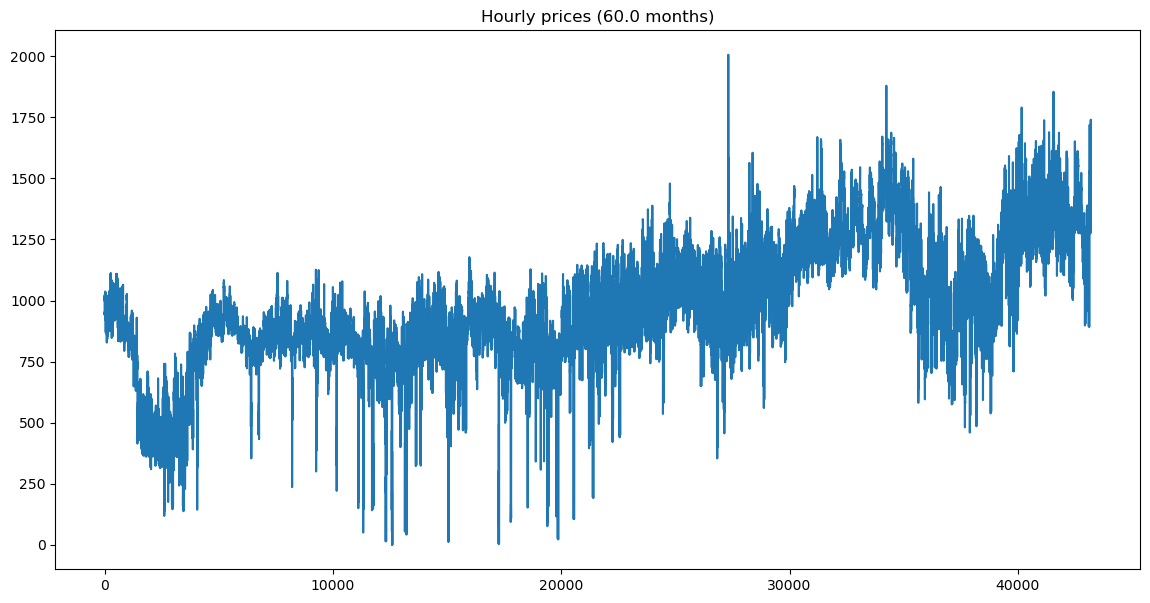

In [4]:
y = df_sup['supplier_price'].to_numpy()
plot_range = 24 * 30 * 12 * 5 # 60 months

plt.figure(figsize = (14, 7))
plt.plot(y[:plot_range])
plt.title(f'Hourly prices ({round(plot_range / 24 / 30, 2)} months)')
plt.show()

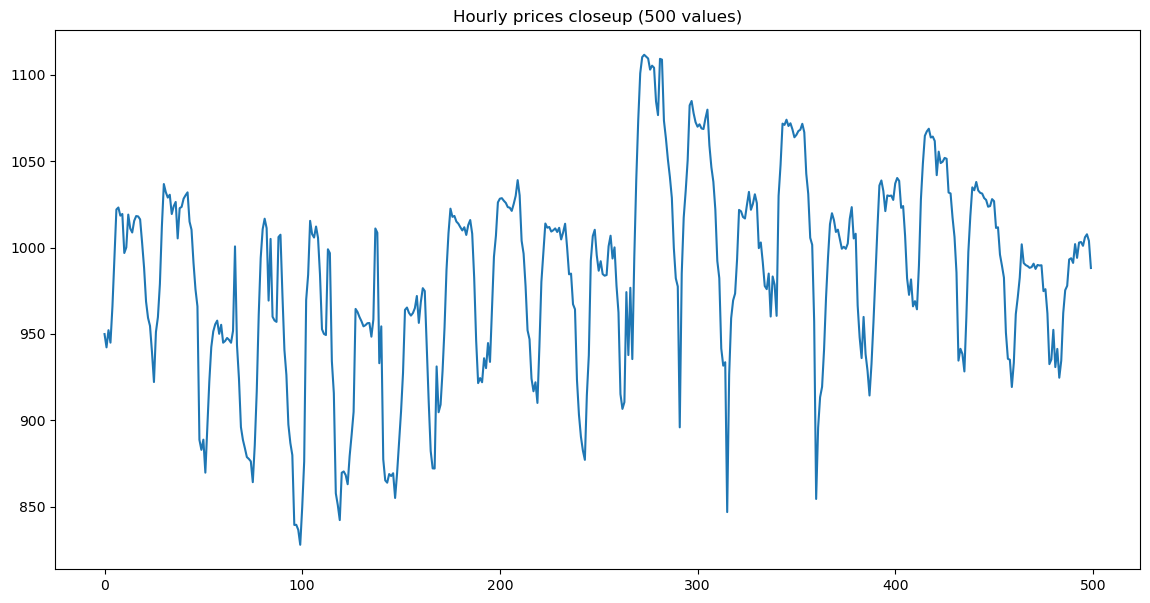

In [105]:
closeup_range = 500

plt.figure(figsize = (14, 7))
plt.plot(y[:closeup_range])
plt.title(f'Hourly prices closeup ({closeup_range} values)')
plt.show()

In [100]:
import numpy as np

def make_seasonable_plot(y, num_of_values, plot_range, title):
    timely = np.bincount(np.arange(len(y)) // num_of_values, y) / num_of_values
    plt.figure(figsize = (14, 7))
    plt.plot(timely[:int(plot_range / num_of_values)])
    plt.title(f'{title} ({round(plot_range / 24 / 30, 2)} months)')
    plt.show()

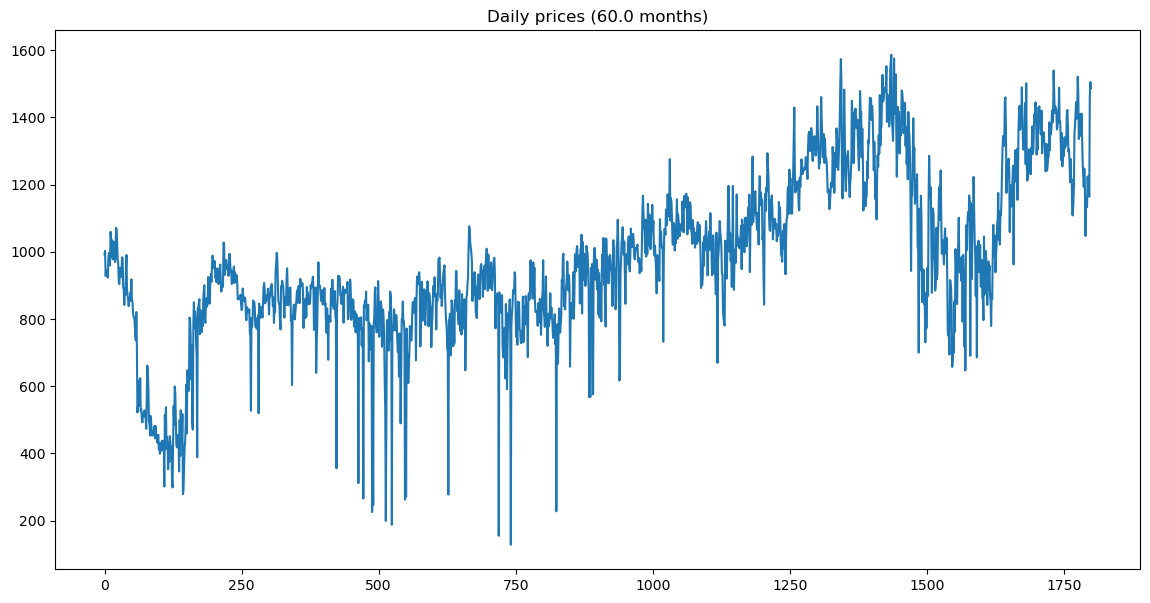

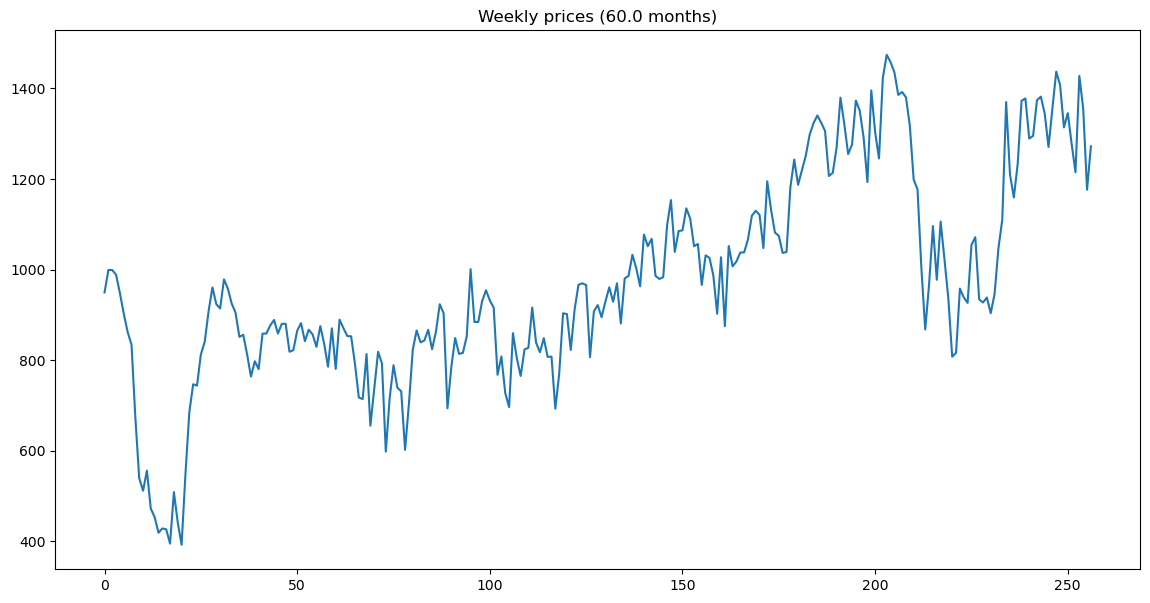

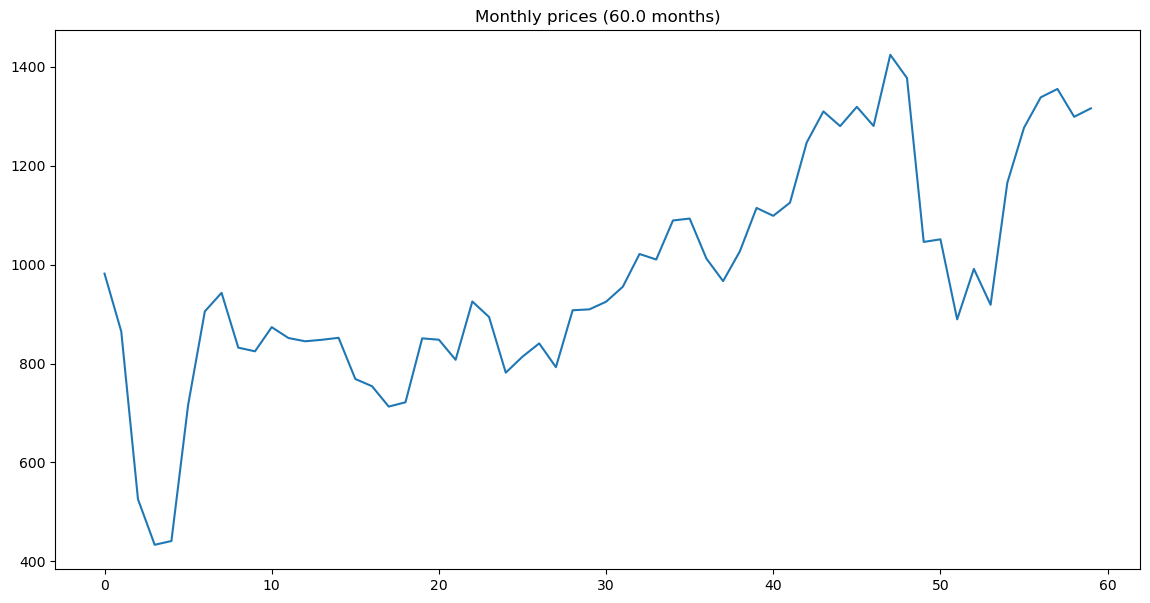

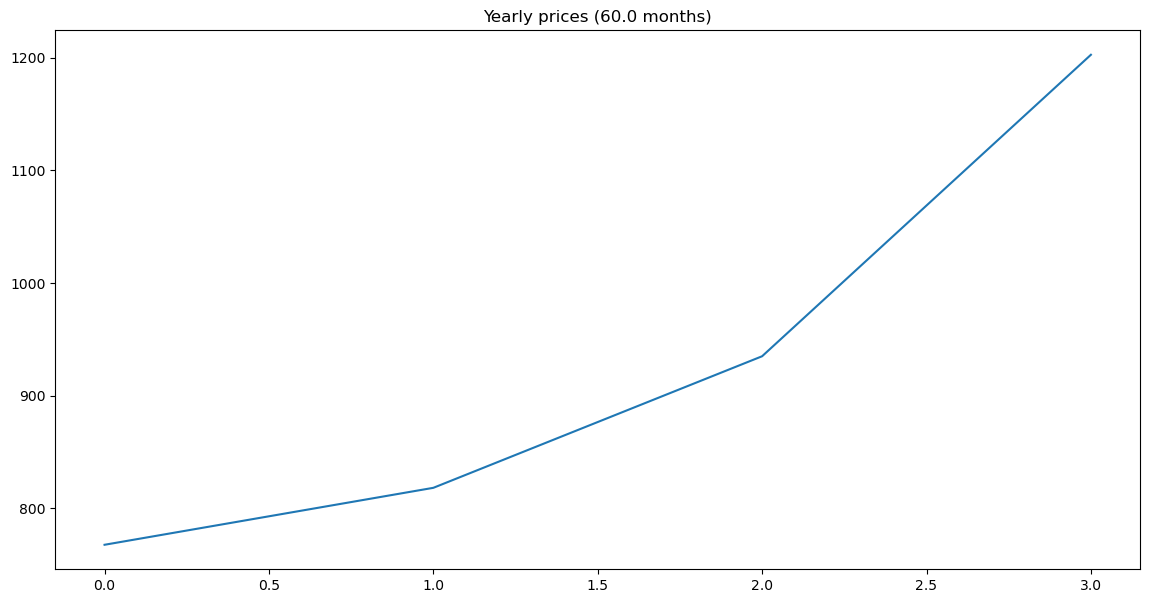

In [101]:
make_seasonable_plot(y, 24, plot_range, 'Daily prices')
make_seasonable_plot(y, 24 * 7, plot_range, 'Weekly prices')
make_seasonable_plot(y, 24 * 30, plot_range, 'Monthly prices')
make_seasonable_plot(y, 24 * 365, plot_range, 'Yearly prices')

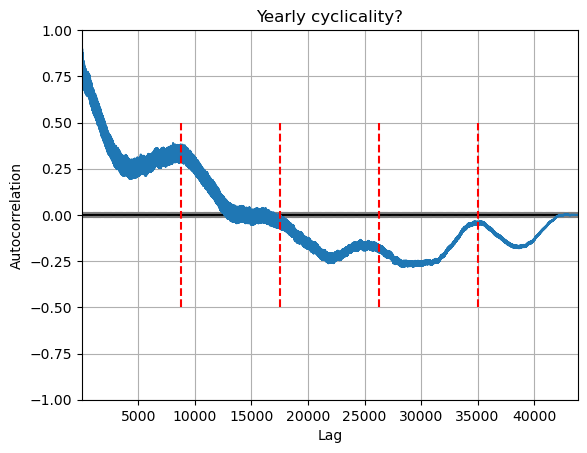

In [14]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
autocorrelation_plot(y)
for i in range(1, 5):
    ax.plot([24 * 365 * i, 24 * 365 * i], [-0.5, 0.5], linestyle = 'dashed', color = 'red')
plt.title('Yearly cyclicality?')
plt.show()

##### Conclusion: the price time series has pronounced daily seasonality. On the bigger time scales some kind of yearly cyclicality can be observed.

### Suppliers' clearing price distribution

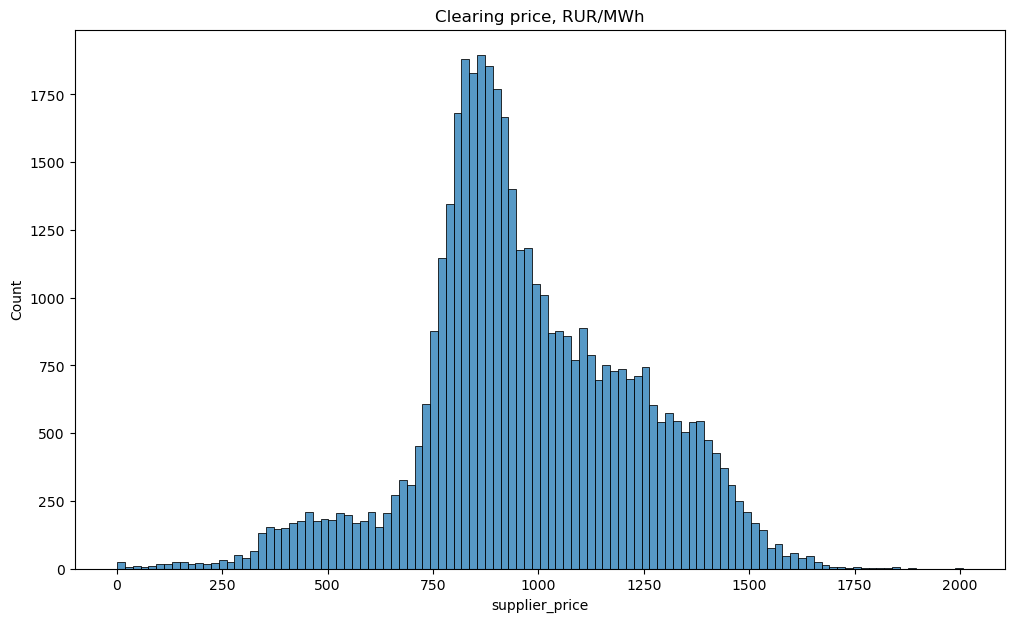

In [166]:
plt.figure(figsize = (12, 7))
plt.title('Clearing price, RUR/MWh')
sb.histplot(df['supplier_price'])
plt.show()

### Statistical tests to check the normality of price distribution

In [162]:
from scipy import stats as st
import statsmodels.api as sm

def run_tests_for_normality(data, alpha = 0.05):
    statistic, p_value = st.normaltest(data)
    if p_value > alpha:
        result = 'Normal'
    else:
        result = 'NOT Normal'
    print(f"D'Agostino & Pearson: {result:>11s}")
    print(statistic)
    print()
    statistic, pvalue = st.jarque_bera(data)
    if pvalue > alpha:
        result = 'Normal'
    else:
        result = 'NOT Normal'
    print(f'Jarque-Bera: {result:>20s}')
    print(statistic)
    print()
    ksstat, pvalue = sm.stats.diagnostic.kstest_normal(data)
    if pvalue > alpha:
        result = 'Normal'
    else:
        result = 'NOT Normal'
    print(f'Kolmogorov-Smirnov: {result:>13s}')
    print(ksstat)
    print()
    ksstat, pvalue = sm.stats.diagnostic.lilliefors(data)
    if pvalue > alpha:
        result = 'Normal'
    else:
        result = 'NOT Normal'
    print(f'Lilliefors: {result:>21s}')
    print(ksstat)
    print()
    statistic, pvalue = st.shapiro(data)
    if pvalue > alpha:
        result = 'Normal'
    else:
        result = 'NOT Normal'
    print(f'Shapiro-Wilk: {result:>19s}')
    print(statistic)
    print()
    result = st.anderson(data)
    idx = np.where(result.significance_level == alpha * 100)
    if result.statistic < result.critical_values[idx]:
        verdict = 'Normal'
    else:
        verdict = 'NOT Normal'
    print(f'Anderson–Darling: {verdict:>15s}')
    print(result.statistic)
    print()

def show_probability_plot(data):
    st.probplot(data, dist = 'norm', plot = plt)
    plt.show()

def show_quantile_quantile_plot(data):
    sm.qqplot(data, line = '45')
    plt.show()

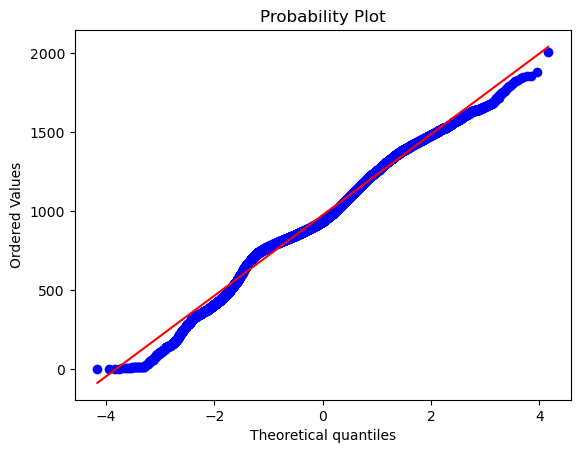

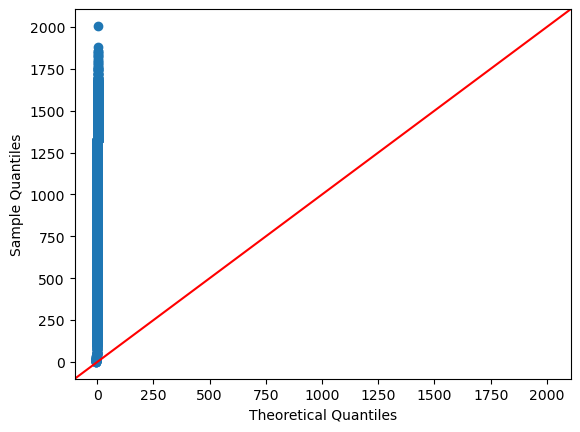

D'Agostino & Pearson:  NOT Normal
132.41352354071472

Jarque-Bera:           NOT Normal
169.63672190328668

Kolmogorov-Smirnov:    NOT Normal
0.061964345409667804

Lilliefors:            NOT Normal
0.061964345409667804

Shapiro-Wilk:          NOT Normal
0.9839980006217957

Anderson–Darling:      NOT Normal
299.56824790379324



C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [165]:
show_probability_plot(df['supplier_price'])
show_quantile_quantile_plot(df['supplier_price'])
run_tests_for_normality(df['supplier_price'])

### The supplier price outliers check

In [137]:
df_sup[(df_sup['supplier_price'] < 10)]

year  quarter  month  week_of_year  day_of_year   
date                                                                         
2020-11-01 20:00:00+00:00  2020        4     11            44          306  \
2020-11-01 21:00:00+00:00  2020        4     11            44          306   
2020-11-01 22:00:00+00:00  2020        4     11            44          306   
2020-11-01 23:00:00+00:00  2020        4     11            44          306   
2021-05-15 01:00:00+00:00  2021        2      5            19          135   
2021-05-15 02:00:00+00:00  2021        2      5            19          135   
2021-05-15 20:00:00+00:00  2021        2      5            19          135   
2021-05-15 22:00:00+00:00  2021        2      5            19          135   
2021-05-15 23:00:00+00:00  2021        2      5            19          135   

                           day_of_week  day  hour  supplier_price  
date                                                               
2020-11-01 20:00:00+00:00            6    1    20            0.45  
2020-11-01 21:00:00+00:00            6    1    21            0.99  
2020-11-01 22:00:00+00:00            6    1    22            0.46  
2020-11-01 23:00:00+00:00            6    1    23            0.46  
2021-05-15 01:00:00+00:00            5   15     1            6.00  
2021-05-15 02:00:00+00:00            5   15     2            4.51  
2021-05-15 20:00:00+00:00            5   15    20            4.43  
2021-05-15 22:00:00+00:00            5   15    22            4.56  
2021-05-15 23:00:00+00:00            5   15    23            6.90

##### This shows a small amount of prices that are close to zero.

In [146]:
from scipy import stats
import numpy as np

def remove_outliers(df, column):
    q_low = df[column].quantile(0.01)
    q_high = df[column].quantile(0.99)
    return df[(df[column] < q_high) & (df[column] > q_low)]

def remove_outliers_z_score(df, column):
    result = df.copy()
    result['z_score'] = stats.zscore(df[column])
    result = result.loc[result['z_score'].abs() <= 3]
    return result

def remove_outliers_iqr(df, column):
    q1 = np.percentile(df[column], 25, method = 'linear')
    q3 = np.percentile(df[column], 75, method = 'linear')
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    upper_array = np.where(df[column] >= upper)[0]
    lower_array = np.where(df[column] <= lower)[0]
    result = df.copy().reset_index().drop(columns = 'date')
    result.drop(index = upper_array, inplace = True)
    result.drop(index = lower_array, inplace = True)
    return result

In [148]:
df1 = remove_outliers(df_sup, 'supplier_price')
df2 = remove_outliers_z_score(df_sup, 'supplier_price')
df3 = remove_outliers_iqr(df_sup, 'supplier_price')

ratio1 = (len(df_sup) - len(df1)) * 100.0 / len(df_sup)
print(f'Outliers count (1st and 99th quantiles): {len(df_sup) - len(df1)} ({round(ratio1, 2)}%)')
ratio2 = (len(df_sup) - len(df2)) * 100.0 / len(df_sup)
print(f'Outliers count (Z-score): {len(df_sup) - len(df2)} ({round(ratio2, 2)}%)')
ratio3 = (len(df_sup) - len(df3)) * 100.0 / len(df_sup)
print(f'Outliers count (IQR): {len(df_sup) - len(df3)} ({round(ratio3, 2)}%)')

Outliers count (1st and 99th quantiles): 878 (2.0%)
Outliers count (Z-score): 190 (0.43%)
Outliers count (IQR): 477 (1.09%)


##### Such a small amount of outliers can be ignored.

### What is the difference between consumer and supplier prices look like?

In [152]:
sup_prices = df['supplier_price'].to_numpy()
con_prices = df['consumer_price'].to_numpy()
result = con_prices - sup_prices
result

array([27.24, 21.42, 20.99, ..., 66.23, 56.47, 49.31])

In [154]:
pd.DataFrame(result, columns = ['result']).describe()

result
count  43872.000000
mean      69.016620
std       34.340587
min      -10.920000
25%       44.380000
50%       60.080000
75%       85.030000
max      316.420000

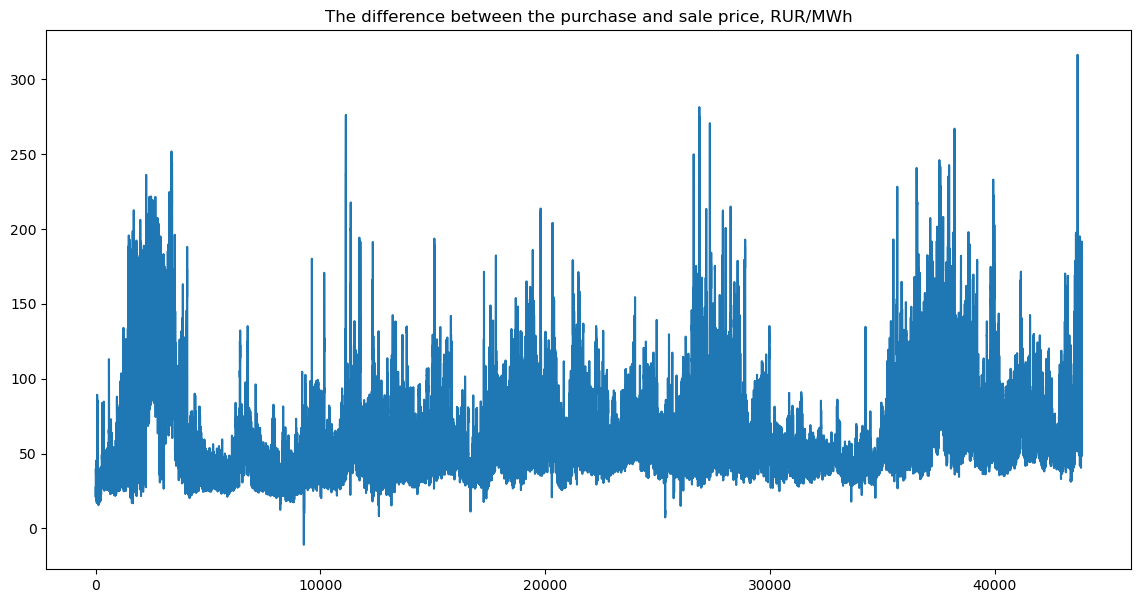

In [155]:
plt.figure(figsize = (14, 7))
plt.plot(result)
plt.title('The difference between the purchase and sale price, RUR/MWh')
plt.show()

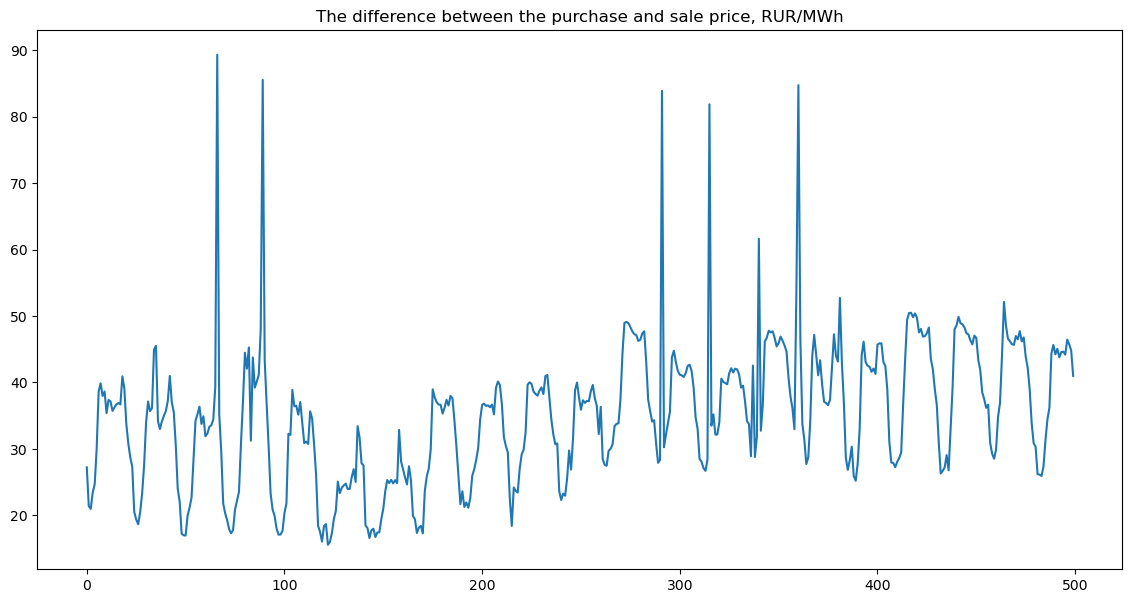

In [160]:
plt.figure(figsize = (14, 7))
plt.plot(result[:500])
plt.title('The difference between the purchase and sale price, RUR/MWh')
plt.show()

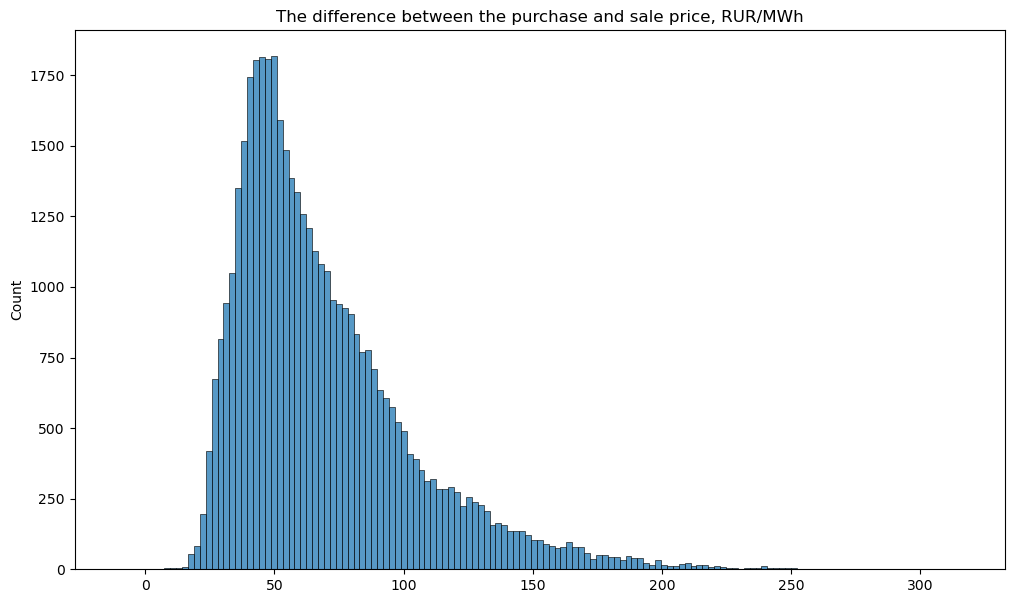

In [161]:
import seaborn as sb

plt.figure(figsize = (12, 7))
plt.title('The difference between the purchase and sale price, RUR/MWh')
sb.histplot(result)
plt.show()

# Feature engineering

## Let's drop all columns except the target feature

In [106]:
df = df[['supplier_price']]
df

supplier_price
date                                     
2019-05-27 00:00:00+00:00          949.90
2019-05-27 01:00:00+00:00          942.20
2019-05-27 02:00:00+00:00          952.14
2019-05-27 03:00:00+00:00          944.93
2019-05-27 04:00:00+00:00          966.00
...                                   ...
2024-05-27 19:00:00+00:00         1227.36
2024-05-27 20:00:00+00:00         1010.99
2024-05-27 21:00:00+00:00          936.12
2024-05-27 22:00:00+00:00          900.28
2024-05-27 23:00:00+00:00          861.15

[43872 rows x 1 columns]

In [108]:
df_sup = df.copy()

## Time features engineering

In [121]:
df_sup.index = pd.to_datetime(df_sup.index)
df_sup

supplier_price
date                                     
2019-05-27 00:00:00+00:00          949.90
2019-05-27 01:00:00+00:00          942.20
2019-05-27 02:00:00+00:00          952.14
2019-05-27 03:00:00+00:00          944.93
2019-05-27 04:00:00+00:00          966.00
...                                   ...
2024-05-27 19:00:00+00:00         1227.36
2024-05-27 20:00:00+00:00         1010.99
2024-05-27 21:00:00+00:00          936.12
2024-05-27 22:00:00+00:00          900.28
2024-05-27 23:00:00+00:00          861.15

[43872 rows x 1 columns]

In [123]:
def add_time_features(df):
    df['year'] = df.index.year
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['week_of_year'] = pd.Index(df.index.isocalendar().week)
    df['week_of_year'] = df['week_of_year'].astype(int)
    df['day'] = df.index.day
    df['day_of_year'] = df.index.dayofyear
    df['day_of_week'] = df.index.dayofweek
    df['hour'] = df.index.hour
    
add_time_features(df_sup)
df_sup

supplier_price  year  quarter  month  week_of_year   
date                                                                            
2019-05-27 00:00:00+00:00          949.90  2019        2      5            22  \
2019-05-27 01:00:00+00:00          942.20  2019        2      5            22   
2019-05-27 02:00:00+00:00          952.14  2019        2      5            22   
2019-05-27 03:00:00+00:00          944.93  2019        2      5            22   
2019-05-27 04:00:00+00:00          966.00  2019        2      5            22   
...                                   ...   ...      ...    ...           ...   
2024-05-27 19:00:00+00:00         1227.36  2024        2      5            22   
2024-05-27 20:00:00+00:00         1010.99  2024        2      5            22   
2024-05-27 21:00:00+00:00          936.12  2024        2      5            22   
2024-05-27 22:00:00+00:00          900.28  2024        2      5            22   
2024-05-27 23:00:00+00:00          861.15  2024        2      5            22   

                           day  day_of_year  day_of_week  hour  
date                                                            
2019-05-27 00:00:00+00:00   27          147            0     0  
2019-05-27 01:00:00+00:00   27          147            0     1  
2019-05-27 02:00:00+00:00   27          147            0     2  
2019-05-27 03:00:00+00:00   27          147            0     3  
2019-05-27 04:00:00+00:00   27          147            0     4  
...                        ...          ...          ...   ...  
2024-05-27 19:00:00+00:00   27          148            0    19  
2024-05-27 20:00:00+00:00   27          148            0    20  
2024-05-27 21:00:00+00:00   27          148            0    21  
2024-05-27 22:00:00+00:00   27          148            0    22  
2024-05-27 23:00:00+00:00   27          148            0    23  

[43872 rows x 9 columns]

## Showcase of the supplier price time features

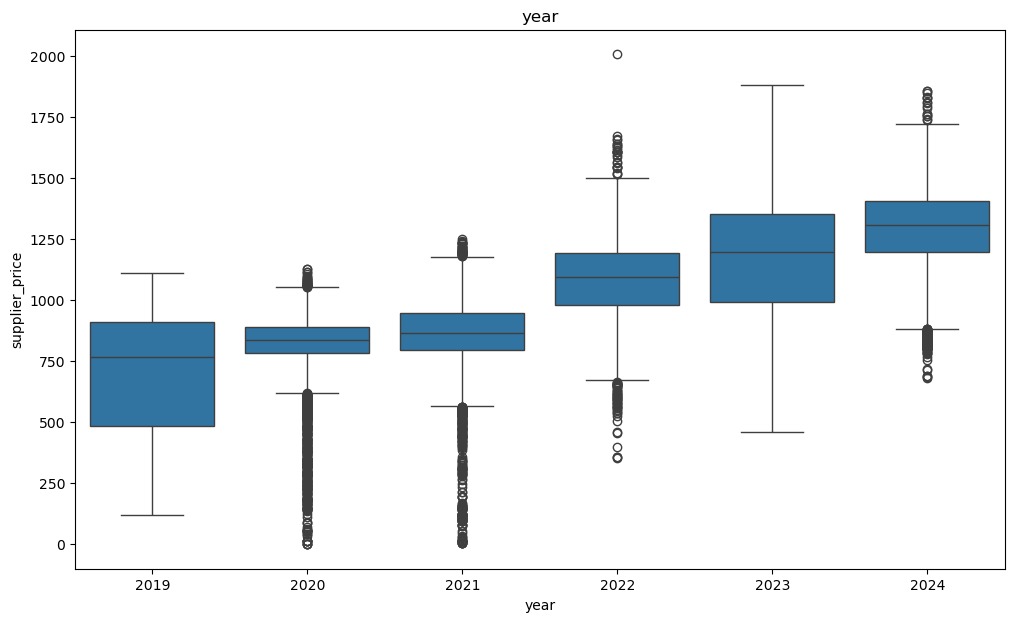

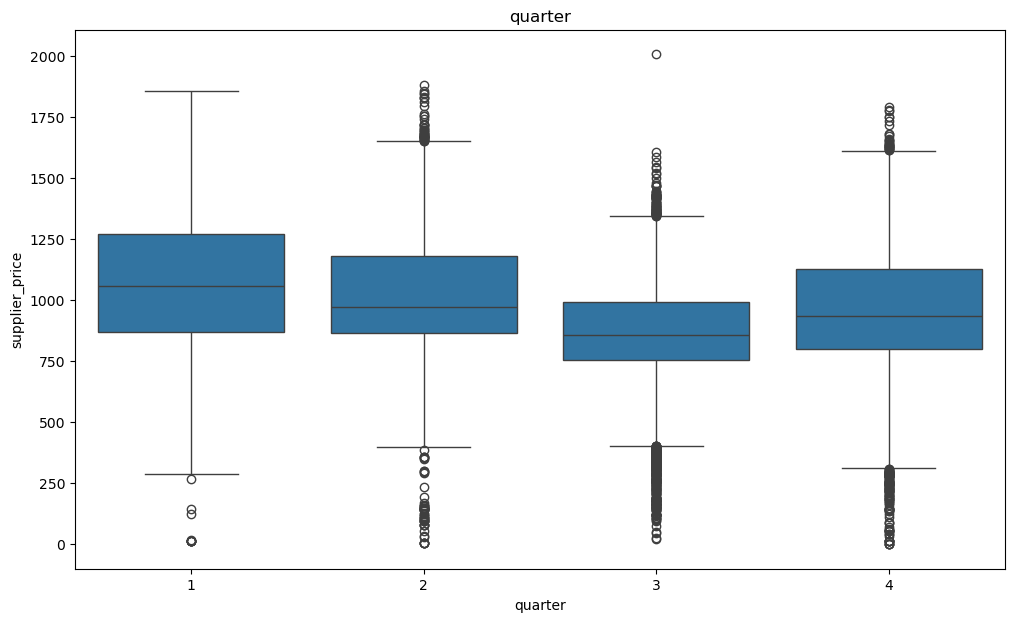

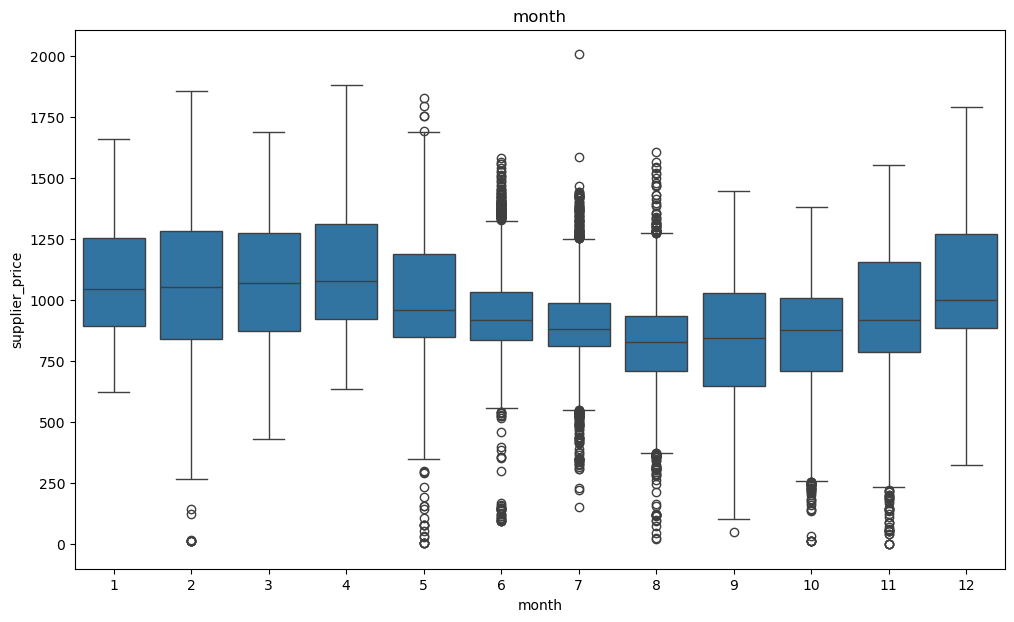

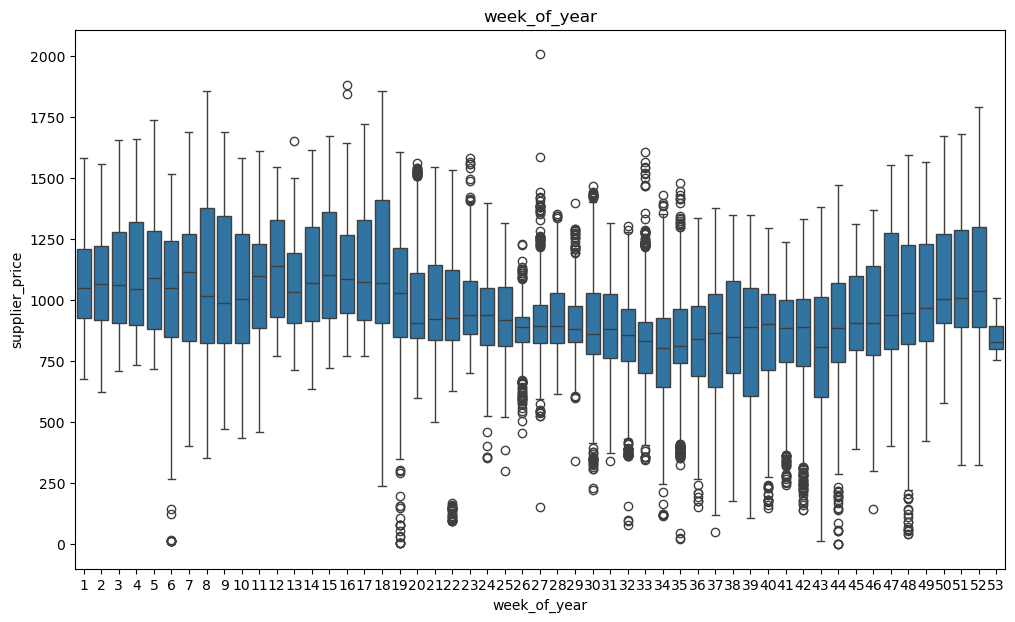

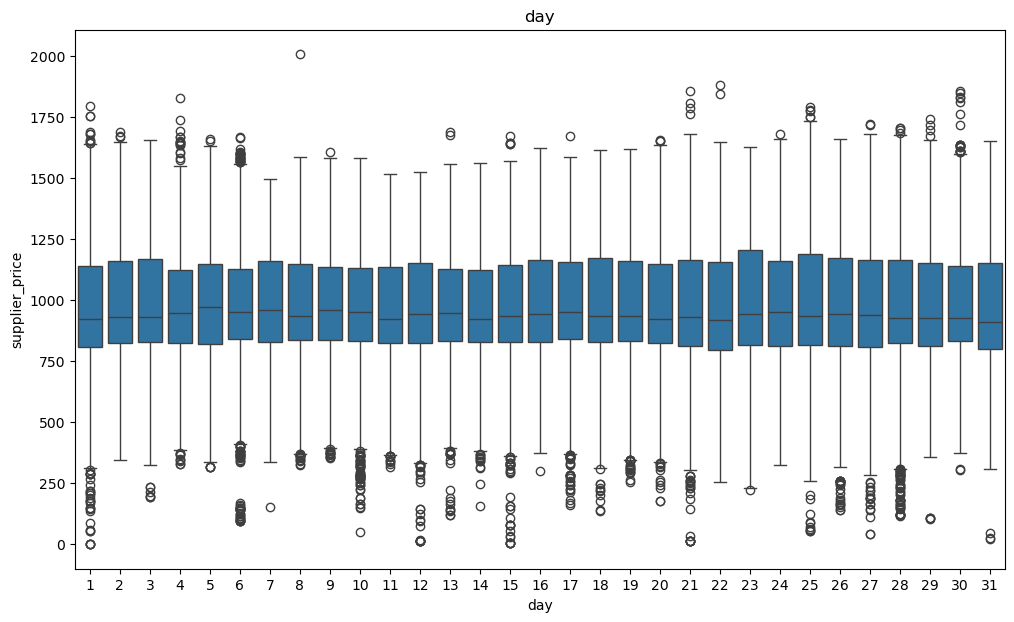

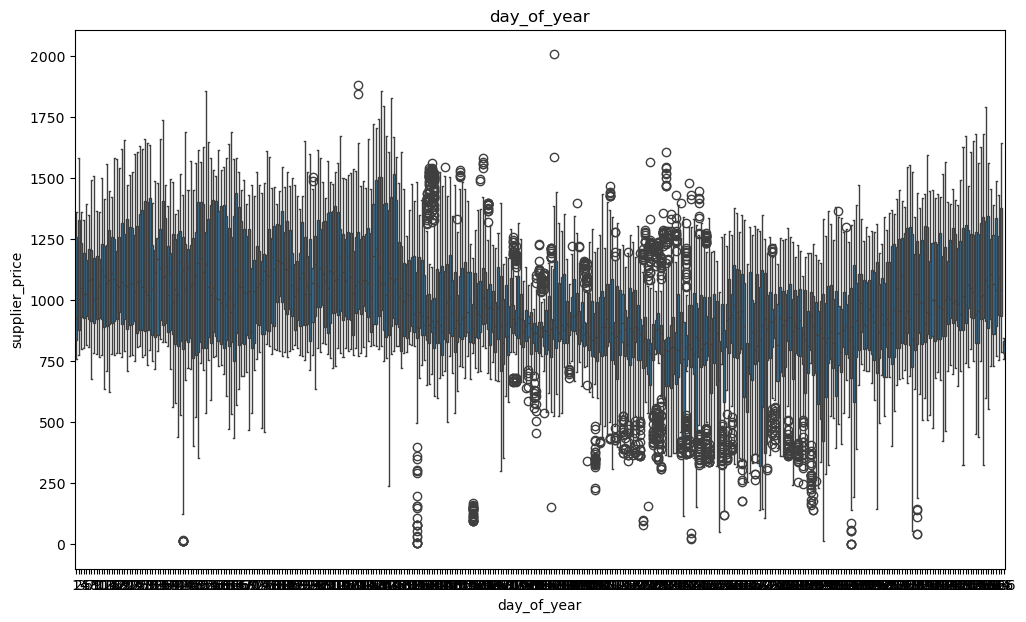

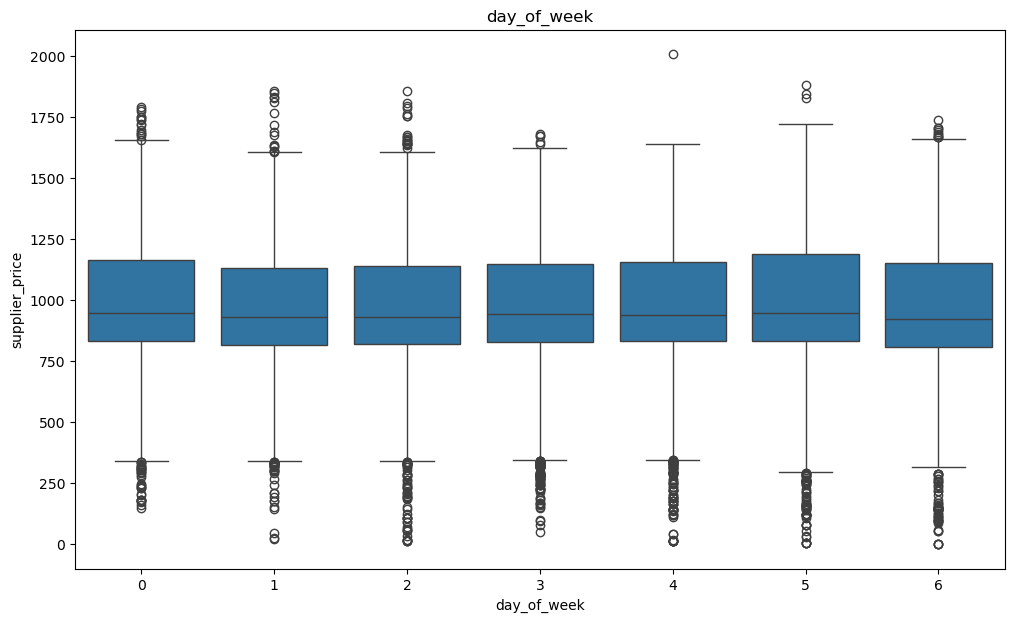

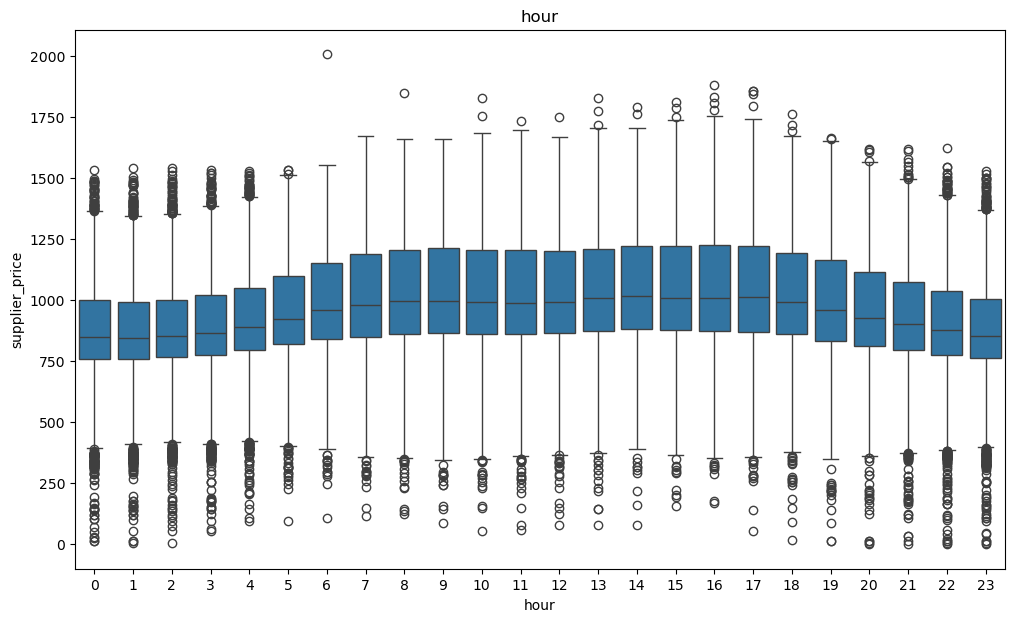

In [132]:
import matplotlib.pyplot as plt
import seaborn as sb

time_features = [
    'year',
    'quarter',
    'month',
    'week_of_year',
    'day',
    'day_of_year',
    'day_of_week',
    'hour'
]

for feature in time_features:
    plt.figure(figsize = (12, 7))
    plt.title(feature)
    sb.boxplot(x = feature, y = 'supplier_price', data = df_sup)
    plt.show()

## Let's rearrange dataset

In [133]:
df_sup = df_sup[['year', 'quarter', 'month', 'week_of_year', 'day_of_year', 'day_of_week', 'day', 'hour', 'supplier_price']]
df_sup.to_csv('electricity_price_hourly_supplier_fix.csv', index = True)
df_sup

year  quarter  month  week_of_year  day_of_year   
date                                                                         
2019-05-27 00:00:00+00:00  2019        2      5            22          147  \
2019-05-27 01:00:00+00:00  2019        2      5            22          147   
2019-05-27 02:00:00+00:00  2019        2      5            22          147   
2019-05-27 03:00:00+00:00  2019        2      5            22          147   
2019-05-27 04:00:00+00:00  2019        2      5            22          147   
...                         ...      ...    ...           ...          ...   
2024-05-27 19:00:00+00:00  2024        2      5            22          148   
2024-05-27 20:00:00+00:00  2024        2      5            22          148   
2024-05-27 21:00:00+00:00  2024        2      5            22          148   
2024-05-27 22:00:00+00:00  2024        2      5            22          148   
2024-05-27 23:00:00+00:00  2024        2      5            22          148   

                           day_of_week  day  hour  supplier_price  
date                                                               
2019-05-27 00:00:00+00:00            0   27     0          949.90  
2019-05-27 01:00:00+00:00            0   27     1          942.20  
2019-05-27 02:00:00+00:00            0   27     2          952.14  
2019-05-27 03:00:00+00:00            0   27     3          944.93  
2019-05-27 04:00:00+00:00            0   27     4          966.00  
...                                ...  ...   ...             ...  
2024-05-27 19:00:00+00:00            0   27    19         1227.36  
2024-05-27 20:00:00+00:00            0   27    20         1010.99  
2024-05-27 21:00:00+00:00            0   27    21          936.12  
2024-05-27 22:00:00+00:00            0   27    22          900.28  
2024-05-27 23:00:00+00:00            0   27    23          861.15  

[43872 rows x 9 columns]